# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# Ingest Data  

In [2]:
df0 = pd.read_excel("world _military_power.xlsx", header=1)
df = df0.copy()

In [3]:
df.head().T

0               1  \
Military Strength                            Afghanistan         Albania   
Military Strength Power Index                     1.3444          2.3137   
Aircraft Strength                            Afghanistan         Albania   
Aircraft Strength value                            260.0            19.0   
Fighter/Interceptor Strength                 Afghanistan         Albania   
Fighter/Interceptor Strength value                   0.0             0.0   
Attack Aircraft Strength                     Afghanistan         Albania   
Attack Aircraft Strength value                      25.0             0.0   
Transport Aircraft Fleet Strength            Afghanistan         Albania   
Transport Aircraft Fleet Strength value             30.0             0.0   
Trainer Aircraft Fleet                       Afghanistan         Albania   
Trainer Aircraft Fleet value                         0.0             0.0   
Helicopter Fleet Strength                    Afghanistan         Albania   
Helicopter Fleet Strength value                    187.0            19.0   
Attack Helicopter Fleet Strength             Afghanistan         Albania   
Attack Helicopter Fleet Strength value               0.0             0.0   
Tank Strength                                Afghanistan         Albania   
Tank Strength value                                  0.0             0.0   
AFV/APC Strength                             Afghanistan         Albania   
AFV/APC Strength value                            1062.0           467.0   
Self-Propelled Artillery Strength            Afghanistan         Albania   
Self-Propelled Artillery Strength value              0.0             0.0   
Towed Artillery Strength                     Afghanistan         Albania   
Towed Artillery Strength value                     176.0             0.0   
Rocket Projector Strength                    Afghanistan         Albania   
Rocket Projector Strength value                     50.0             0.0   
Navy Fleet Strengths                         Afghanistan         Albania   
Navy Fleet Strengths value                           0.0            38.0   
Aircraft Carrier Fleet Strength              Afghanistan         Albania   
Aircraft Carrier Fleet Strength value                0.0             0.0   
Submarine Fleet Strength                     Afghanistan         Albania   
Submarine Fleet Strength value                       0.0             0.0   
Destroyer Fleet Strength                     Afghanistan         Albania   
Destroyer Fleet Strength value                       0.0             0.0   
Frigate Fleet Strength                       Afghanistan         Albania   
Frigate Fleet Strength value                         0.0             0.0   
defense spending budget                      Afghanistan         Albania   
defense spending budget value            12,00,00,00,000    25,00,00,000   
External Debt                                Afghanistan         Albania   
External Debt value                       2,84,00,00,000  9,50,50,00,000   
Airport Totals                               Afghanistan         Albania   
Airport Totals value                                43.0             4.0   
Oil Production                               Afghanistan         Albania   
Oil Production value                                 0.0         16000.0   
Oil Consumption                              Afghanistan         Albania   
Oil Consumption value                             5500.0         42500.0   
Proven Oil Reserves                          Afghanistan         Albania   
Proven Oil Reserves value                            0.0    16,83,00,000   
Available Manpower                           Afghanistan         Albania   
Available Manpower value                     1,43,25,743       15,19,438   
Total Population                             Afghanistan         Albania   
Total Population value                       3,49,40,837       30,57,220   
Total Square Land Area     

# EDA

### Implement basic steps to see how is your data looks like

In [4]:
df.shape

(138, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [6]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [7]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [8]:
df.describe().T

count         mean          std  \
military_strength_power_index            138.0     1.460716     1.324018   
aircraft_strength_value                  138.0   388.471014  1231.981859   
fighter/interceptor_strength_value       138.0    81.565217   230.324777   
attack_aircraft_strength_value           138.0    25.760870    94.528222   
transport_aircraft_fleet_strength_value  138.0    30.231884    92.330436   
trainer_aircraft_fleet_value             138.0    82.833333   240.803721   
helicopter_fleet_strength_value          138.0   154.065217   520.183631   
attack_helicopter_fleet_strength_value   138.0    25.623188    97.326091   
tank_strength_value                      138.0   646.565217  1515.463683   
afv/apc_strength_value                   138.0  2485.695652  5410.546392   
self-propelled_artillery_strength_value  138.0   212.159420   688.028987   
towed_artillery_strength_value           138.0   393.978261   805.781703   
rocket_projector_strength_value          138.0   156.934783   484.380984   
navy_fleet_strengths_value               124.0    84.983871   146.114165   
aircraft_carrier_fleet_strength_value    115.0     0.382609     1.971653   
submarine_fleet_strength_value           115.0     4.800000    13.706958   
destroyer_fleet_strength_value           115.0     2.052174    10.000740   
frigate_fleet_strength_value             115.0     3.521739     6.481211   
airport_totals_value                     138.0   290.043478  1212.967393   
total_border_coverage_value              129.0  3964.224806  3760.099671   

                                             min        25%        50%  \
military_strength_power_index             0.0606     0.5748     1.0341   
aircraft_strength_value                   0.0000    33.0000   111.0000   
fighter/interceptor_strength_value        0.0000     0.0000    17.0000   
attack_aircraft_strength_value            0.0000     0.0000     0.0000   
transport_aircraft_fleet_strength_value   0.0000     3.0000     9.0000   
trainer_aircraft_fleet_value              0.0000     4.2500    26.0000   
helicopter_fleet_strength_value           0.0000    15.2500    44.0000   
attack_helicopter_fleet_strength_value    0.0000     0.0000     2.0000   
tank_strength_value                       0.0000    19.2500   153.0000   
afv/apc_strength_value                    0.0000   250.2500   734.5000   
self-propelled_artillery_strength_value   0.0000     0.0000    23.0000   
towed_artillery_strength_value            0.0000    24.2500   108.0000   
rocket_projector_strength_value           0.0000     0.0000    24.0000   
navy_fleet_strengths_value                0.0000    10.0000    38.0000   
aircraft_carrier_fleet_strength_value     0.0000     0.0000     0.0000   
submarine_fleet_strength_value            0.0000     0.0000     0.0000   
destroyer_fleet_strength_value            0.0000     0.0000     0.0000   
frigate_fleet_strength_value              0.0000     0.0000     0.0000   
airport_totals_value                      2.0000    33.5000    68.0000   
total_border_coverage_value              29.0000  1587.0000  2816.0000   

                                                 75%         max  
military_strength_power_index               2.021525     10.1681  
aircraft_strength_value                   290.250000  13264.0000  
fighter/interceptor_strength_value         60.500000   2085.0000  
attack_aircraft_strength_value             15.750000    742.0000  
transport_aircraft_fleet_strength_value    26.000000    945.0000  
trainer_aircraft_fleet_value               79.250000   2643.0000  
helicopter_fleet_strength_value           126.750000   5768.0000  
attack_helicopter_fleet_strength_value     17.750000    967.0000  
tank_strength_value                       436.250000  12950.0000  
afv/apc_strength_value                   2000.000000  39253.0000  
self-propelled_artillery_strength_value    97.250000   6083.0000  
towed_artillery_strength_value            296.500000   4465.0000  
rocket_projector_s

In [9]:
df.describe(include=object).T

count unique             top  freq
military_strength                    138    138     Afghanistan     1
aircraft_strength                    138    138     Afghanistan     1
fighter/interceptor_strength         138    138     Afghanistan     1
attack_aircraft_strength             138    138     Afghanistan     1
transport_aircraft_fleet_strength    138    138     Afghanistan     1
trainer_aircraft_fleet               138    138     Afghanistan     1
helicopter_fleet_strength            138    138     Afghanistan     1
attack_helicopter_fleet_strength     138    138     Afghanistan     1
tank_strength                        138    138     Afghanistan     1
afv/apc_strength                     138    138     Afghanistan     1
self-propelled_artillery_strength    138    138     Afghanistan     1
towed_artillery_strength             138    138     Afghanistan     1
rocket_projector_strength            138    138     Afghanistan     1
navy_fleet_strengths                 124    124     Afghanistan     1
aircraft_carrier_fleet_strength      115    115     Afghanistan     1
submarine_fleet_strength             115    115     Afghanistan     1
destroyer_fleet_strength             115    115     Afghanistan     1
frigate_fleet_strength               115    115     Afghanistan     1
defense_spending_budget              138    138     Afghanistan     1
defense_spending_budget_value        138    124  2,50,00,00,000     3
external_debt                        138    138     Afghanistan     1
external_debt_value                  138    138  2,84,00,00,000     1
airport_totals                       138    138     Afghanistan     1
oil_production                       138    138     Afghanistan     1
oil_production_value               138.0   88.0             0.0  46.0
oil_consumption                      138    138     Afghanistan     1
oil_consumption_value              138.0  102.0         18500.0   4.0
proven_oil_reserves                  138    138     Afghanistan     1
proven_oil_reserves_value          138.0   84.0             0.0  46.0
available_manpower                   138    138     Afghanistan     1
available_manpower_value             138    138     1,43,25,743     1
total_population                     138    138     Afghanistan     1
total_population_value               138    138     3,49,40,837     1
total_square_land_area               138    138     Afghanistan     1
total_square_land_area_value         138    138        6,52,230     1
total_coastline_coverage             109    109     Afghanistan     1
total_coastline_coverage_value     109.0  104.0           853.0   2.0
total_waterway_coverage              138    138     Afghanistan     1
total_waterway_coverage_value      138.0   92.0             0.0  38.0
total_border_coverage                129    129     Afghanistan     1

In [10]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [11]:
df.duplicated().value_counts()

False    138
dtype: int64

In [12]:
duplicate = df[df.duplicated()]

In [13]:
duplicate

Empty DataFrame
Columns: [military_strength, military_strength_power_index, aircraft_strength, aircraft_strength_value, fighter/interceptor_strength, fighter/interceptor_strength_value, attack_aircraft_strength, attack_aircraft_strength_value, transport_aircraft_fleet_strength, transport_aircraft_fleet_strength_value, trainer_aircraft_fleet, trainer_aircraft_fleet_value, helicopter_fleet_strength, helicopter_fleet_strength_value, attack_helicopter_fleet_strength, attack_helicopter_fleet_strength_value, tank_strength, tank_strength_value, afv/apc_strength, afv/apc_strength_value, self-propelled_artillery_strength, self-propelled_artillery_strength_value, towed_artillery_strength, towed_artillery_strength_value, rocket_projector_strength, rocket_projector_strength_value, navy_fleet_strengths, navy_fleet_strengths_value, aircraft_carrier_fleet_strength, aircraft_carrier_fleet_strength_value, submarine_fleet_strength, submarine_fleet_strength_value, destroyer_fleet_strength, destroyer_fleet_strength_value, frigate_fleet_strength, frigate_fleet_strength_value, defense_spending_budget, defense_spending_budget_value, external_debt, external_debt_value, airport_totals, airport_totals_value, oil_production, oil_production_value, oil_consumption, oil_consumption_value, proven_oil_reserves, proven_oil_reserves_value, available_manpower, available_manpower_value, total_population, total_population_value, total_square_land_area, total_square_land_area_value, total_coastline_coverage, total_coastline_coverage_value, total_waterway_coverage, total_waterway_coverage_value, total_border_coverage, total_border_coverage_value]
Index: []

[0 rows x 60 columns]

In [14]:
df.drop_duplicates(keep=False, inplace=True)

In [15]:
df.shape

(138, 60)

## Convert multi index columns to one level

In [16]:
df.head(1)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                         1.3444       Afghanistan   

   aircraft_strength_value fighter/interceptor_strength  \
0                    260.0                  Afghanistan   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                 0.0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                            25.0                       Afghanistan   

   transport_aircraft_fleet_strength_value  ... total_population  \
0                                     30.0  ...      Afghanistan   

   total_population_value total_square_land_area  \
0             3,49,40,837            Afghanistan   

   total_square_land_area_value total_coastline_coverage  \
0                      6,52,230              Afghanistan   

   total_coastline_coverage_value total_waterway_coverage  \
0                             0.0             Afghanistan   

   total_waterway_coverage_value total_border_coverage  \
0                         1200.0           Afghanistan   

   total_border_coverage_value  
0                       5987.0  

[1 rows x 60 columns]

In [17]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [18]:
df.head(1).T

0
country                                      Afghanistan
military_strength_power_index                     1.3444
aircraft_strength                            Afghanistan
aircraft_strength_value                            260.0
fighter/interceptor_strength                 Afghanistan
fighter/interceptor_strength_value                   0.0
attack_aircraft_strength                     Afghanistan
attack_aircraft_strength_value                      25.0
transport_aircraft_fleet_strength            Afghanistan
transport_aircraft_fleet_strength_value             30.0
trainer_aircraft_fleet                       Afghanistan
trainer_aircraft_fleet_value                         0.0
helicopter_fleet_strength                    Afghanistan
helicopter_fleet_strength_value                    187.0
attack_helicopter_fleet_strength             Afghanistan
attack_helicopter_fleet_strength_value               0.0
tank_strength                                Afghanistan
tank_strength_value                                  0.0
afv/apc_strength                             Afghanistan
afv/apc_strength_value                            1062.0
self-propelled_artillery_strength            Afghanistan
self-propelled_artillery_strength_value              0.0
towed_artillery_strength                     Afghanistan
towed_artillery_strength_value                     176.0
rocket_projector_strength                    Afghanistan
rocket_projector_strength_value                     50.0
navy_fleet_strengths                         Afghanistan
navy_fleet_strengths_value                           0.0
aircraft_carrier_fleet_strength              Afghanistan
aircraft_carrier_fleet_strength_value                0.0
submarine_fleet_strength                     Afghanistan
submarine_fleet_strength_value                       0.0
destroyer_fleet_strength                     Afghanistan
destroyer_fleet_strength_value                       0.0
frigate_fleet_strength                       Afghanistan
frigate_fleet_strength_value                         0.0
defense_spending_budget                      Afghanistan
defense_spending_budget_value            12,00,00,00,000
external_debt                                Afghanistan
external_debt_value                       2,84,00,00,000
airport_totals                               Afghanistan
airport_totals_value                                43.0
oil_production                               Afghanistan
oil_production_value                                 0.0
oil_consumption                              Afghanistan
oil_consumption_value                             5500.0
proven_oil_reserves                          Afghanistan
proven_oil_reserves_value                            0.0
available_manpower                           Afghanistan
available_manpower_value                     1,43,25,743
total_population                             Afghanistan
total_population_value                       3,49,40,837
total_square_land_area                       Afghanistan
total_square_land_area_value                    6,52,230
total_coastline_coverage                     Afghanistan
total_coastline_coverage_value                       0.0
total_waterway_coverage                      Afghanistan
total_waterway_coverage_value                     1200.0
total_border_coverage                        Afghanistan
total_border_coverage_value                       5987.0

## Detect and drop duplicated columns

In [19]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [20]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [21]:
df.drop(drop_columns, axis = 1, inplace = True)

In [22]:
df.head(1).T

0
country                                      Afghanistan
military_strength_power_index                     1.3444
aircraft_strength_value                            260.0
fighter/interceptor_strength_value                   0.0
attack_aircraft_strength_value                      25.0
transport_aircraft_fleet_strength_value             30.0
trainer_aircraft_fleet_value                         0.0
helicopter_fleet_strength_value                    187.0
attack_helicopter_fleet_strength_value               0.0
tank_strength_value                                  0.0
afv/apc_strength_value                            1062.0
self-propelled_artillery_strength_value              0.0
towed_artillery_strength_value                     176.0
rocket_projector_strength_value                     50.0
navy_fleet_strengths_value                           0.0
aircraft_carrier_fleet_strength_value                0.0
submarine_fleet_strength_value                       0.0
destroyer_fleet_strength_value                       0.0
frigate_fleet_strength_value                         0.0
defense_spending_budget_value            12,00,00,00,000
external_debt_value                       2,84,00,00,000
airport_totals_value                                43.0
oil_production_value                                 0.0
oil_consumption_value                             5500.0
proven_oil_reserves_value                            0.0
available_manpower_value                     1,43,25,743
total_population_value                       3,49,40,837
total_square_land_area_value                    6,52,230
total_coastline_coverage_value                       0.0
total_waterway_coverage_value                     1200.0
total_border_coverage_value                       5987.0

In [23]:
df.shape

(138, 31)

## Check for missing values 

In [24]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [25]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29         0.210145
aircraft_carrier_fleet_strength_value                23         0.166667
frigate_fleet_strength_value                         23         0.166667
destroyer_fleet_strength_value                       23         0.166667
submarine_fleet_strength_value                       23         0.166667
navy_fleet_strengths_value                           14         0.101449
total_border_coverage_value                           9         0.065217
helicopter_fleet_strength_value                       0         0.000000
attack_helicopter_fleet_strength_value                0         0.000000
total_waterway_coverage_value                         0         0.000000
aircraft_strength_value                               0         0.000000
total_square_land_area_value                          0         0.000000
total_population_value                                0         0.000000
available_manpower_value                              0         0.000000
proven_oil_reserves_value                             0         0.000000
oil_consumption_value                                 0         0.000000
oil_production_value                                  0         0.000000
airport_totals_value                                  0         0.000000
external_debt_value                                   0         0.000000
defense_spending_budget_value                         0         0.000000
fighter/interceptor_strength_value                    0         0.000000
attack_aircraft_strength_value                        0         0.000000
transport_aircraft_fleet_strength_value               0         0.000000
military_strength_power_index                         0         0.000000
trainer_aircraft_fleet_value                          0         0.000000
rocket_projector_strength_value                       0         0.000000
towed_artillery_strength_value                        0         0.000000
self-propelled_artillery_strength_value               0         0.000000
afv/apc_strength_value                                0         0.000000
tank_strength_value                                   0         0.000000
country                                               0         0.000000

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [26]:
# submarine_fleet_strength_value : South Korea --> 22
# frigate_fleet_strength_value : South Korea --> 4
# destroyer_fleet_strength_value : South Korea --> 12

In [27]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [28]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [29]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [30]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29         0.210145
aircraft_carrier_fleet_strength_value                23         0.166667
frigate_fleet_strength_value                         22         0.159420
destroyer_fleet_strength_value                       22         0.159420
submarine_fleet_strength_value                       22         0.159420
navy_fleet_strengths_value                           14         0.101449
total_border_coverage_value                           9         0.065217
helicopter_fleet_strength_value                       0         0.000000
attack_helicopter_fleet_strength_value                0         0.000000
total_waterway_coverage_value                         0         0.000000
aircraft_strength_value                               0         0.000000
total_square_land_area_value                          0         0.000000
total_population_value                                0         0.000000
available_manpower_value                              0         0.000000
proven_oil_reserves_value                             0         0.000000
oil_consumption_value                                 0         0.000000
oil_production_value                                  0         0.000000
airport_totals_value                                  0         0.000000
external_debt_value                                   0         0.000000
defense_spending_budget_value                         0         0.000000
fighter/interceptor_strength_value                    0         0.000000
attack_aircraft_strength_value                        0         0.000000
transport_aircraft_fleet_strength_value               0         0.000000
military_strength_power_index                         0         0.000000
trainer_aircraft_fleet_value                          0         0.000000
rocket_projector_strength_value                       0         0.000000
towed_artillery_strength_value                        0         0.000000
self-propelled_artillery_strength_value               0         0.000000
afv/apc_strength_value                                0         0.000000
tank_strength_value                                   0         0.000000
country                                               0         0.000000

In [31]:
df.fillna(0, inplace=True)

In [32]:
missing (df)

Missing_Number  Missing_Percent
country                                               0              0.0
submarine_fleet_strength_value                        0              0.0
total_waterway_coverage_value                         0              0.0
total_coastline_coverage_value                        0              0.0
total_square_land_area_value                          0              0.0
total_population_value                                0              0.0
available_manpower_value                              0              0.0
proven_oil_reserves_value                             0              0.0
oil_consumption_value                                 0              0.0
oil_production_value                                  0              0.0
airport_totals_value                                  0              0.0
external_debt_value                                   0              0.0
defense_spending_budget_value                         0              0.0
frigate_fleet_strength_value                          0              0.0
destroyer_fleet_strength_value                        0              0.0
aircraft_carrier_fleet_strength_value                 0              0.0
military_strength_power_index                         0              0.0
navy_fleet_strengths_value                            0              0.0
rocket_projector_strength_value                       0              0.0
towed_artillery_strength_value                        0              0.0
self-propelled_artillery_strength_value               0              0.0
afv/apc_strength_value                                0              0.0
tank_strength_value                                   0              0.0
attack_helicopter_fleet_strength_value                0              0.0
helicopter_fleet_strength_value                       0              0.0
trainer_aircraft_fleet_value                          0              0.0
transport_aircraft_fleet_strength_value               0              0.0
attack_aircraft_strength_value                        0              0.0
fighter/interceptor_strength_value                    0              0.0
aircraft_strength_value                               0              0.0
total_border_coverage_value                           0              0.0

## Fix the dtypes

In [33]:
df.dtypes

country                                     object
military_strength_power_index              float64
aircraft_strength_value                    float64
fighter/interceptor_strength_value         float64
attack_aircraft_strength_value             float64
transport_aircraft_fleet_strength_value    float64
trainer_aircraft_fleet_value               float64
helicopter_fleet_strength_value            float64
attack_helicopter_fleet_strength_value     float64
tank_strength_value                        float64
afv/apc_strength_value                     float64
self-propelled_artillery_strength_value    float64
towed_artillery_strength_value             float64
rocket_projector_strength_value            float64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [34]:
df = df.reset_index(drop = True)

In [35]:
df.set_index('country', inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value 

In [38]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        print(col)
        #df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

oil_production_value
oil_consumption_value
proven_oil_reserves_value
available_manpower_value
total_population_value
total_square_land_area_value
total_coastline_coverage_value
total_waterway_coverage_value


<ipython-input-38-6e11c3db820d>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.dtypes[col] == np.object:


In [39]:
df = df.apply(lambda x : x.astype('string').str.replace(',',''))

In [40]:
df = df.apply(lambda x : x.astype('float'))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value 

In [42]:
df.describe()

military_strength_power_index  aircraft_strength_value  \
count                     138.000000               138.000000   
mean                        1.460716               388.471014   
std                         1.324018              1231.981859   
min                         0.060600                 0.000000   
25%                         0.574800                33.000000   
50%                         1.034100               111.000000   
75%                         2.021525               290.250000   
max                        10.168100             13264.000000   

       fighter/interceptor_strength_value  attack_aircraft_strength_value  \
count                          138.000000                      138.000000   
mean                            81.565217                       25.760870   
std                            230.324777                       94.528222   
min                              0.000000                        0.000000   
25%                              0.000000                        0.000000   
50%                             17.000000                        0.000000   
75%                             60.500000                       15.750000   
max                           2085.000000                      742.000000   

       transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
count                               138.000000                    138.000000   
mean                                 30.231884                     82.833333   
std                                  92.330436                    240.803721   
min                                   0.000000                      0.000000   
25%                                   3.000000                      4.250000   
50%                                   9.000000                     26.000000   
75%                                  26.000000                     79.250000   
max                                 945.000000                   2643.000000   

       helicopter_fleet_strength_value  \
count                       138.000000   
mean                        154.065217   
std                         520.183631   
min                           0.000000   
25%                          15.250000   
50%                          44.000000   
75%                         126.750000   
max                        5768.000000   

       attack_helicopter_fleet_strength_value  tank_strength_value  \
count                              138.000000           138.000000   
mean                                25.623188           646.565217   
std                                 97.326091          1515.463683   
min                                  0.000000             0.000000   
25%                                  0.000000            19.250000   
50%                                  2.000000           153.000000   
75%                                 17.750000           436.250000   
max                                967.000000         12950.000000   

       afv/apc_strength_value  ...  airport_totals_value  \
count              138.000000  ...            138.000000   
mean              2485.695652  ...            290.043478   
std               5410.546392  ...           1212.967393   
min                  0.000000  ...              2.000000   
25%                250.250000  ...             33.500000   
50%                734.500000  ...             68.000000   
75%               2000.000000  ...            150.750000   
max              39253.000000  ...          13513.000000   

       oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
count          1.380000e+02           1.380000e+02               1.380000e+02   
mean           5.855524e+05           7.020187e+05               1.194412e+10   
std            1.667139e+06           2.168810e+06               4.275090e+10   
min            0.000000e+00           2.000000e+03               0.000000e+00   
25%            0.000000e+00           3.250000e+04

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [43]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [44]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [45]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                 0.0
Armenia                     0.0
Austria                     0.0
Belarus                     0.0
Bhutan                      0.0
Bolivia                     0.0
Botswana                    0.0
Burkina Faso                0.0
Central African Republic    0.0
Chad                        0.0
Czechia                     0.0
Ethiopia                    0.0
Hungary                     0.0
Kyrgyzstan                  0.0
Laos                        0.0
Mali                        0.0
Moldova                     0.0
Mongolia                    0.0
Nepal                       0.0
Niger                       0.0
North Macedonia             0.0
Paraguay                    0.0
Serbia                      0.0
Slovakia                    0.0
South Sudan                 0.0
Switzerland                 0.0
Tajikistan                  0.0
Uganda                      0.0
Zambia                      0.0
Zimbabwe                    0.0
Name: total_coastline_coverage_v

In [46]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                   0.0
Armenia                   0.0
Austria                   0.0
Azerbaijan                0.0
Bahrain                   0.0
Bhutan                    0.0
Bosnia and Herzegovina    0.0
Botswana                  0.0
Burkina Faso              0.0
Cameroon                  0.0
Chad                      0.0
El Salvador               0.0
Israel                    0.0
Kazakhstan                0.0
Kenya                     0.0
Kuwait                    0.0
Liberia                   0.0
Libya                     0.0
Mali                      0.0
Mauritania                0.0
Montenegro                0.0
Morocco                   0.0
Namibia                   0.0
Nepal                     0.0
New Zealand               0.0
Oman                      0.0
Qatar                     0.0
Saudi Arabia              0.0
Slovenia                  0.0
Somalia                   0.0
South Africa              0.0
South Sudan               0.0
Tanzania                  0.0
Tu

In [47]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia      0.0
Bahrain        0.0
Japan          0.0
Madagascar     0.0
New Zealand    0.0
Philippines    0.0
Singapore      0.0
Sri Lanka      0.0
Taiwan         0.0
Name: total_border_coverage_value, dtype: float64

In [48]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: float64)

In [49]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [50]:
df.drop(drop_columns, axis = 1, inplace = True)

In [51]:
df.shape

(138, 26)

In [52]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

## Visualy inspect the some features

In [55]:
df.head(1).T

country                                   Afghanistan
military_strength_power_index            1.344400e+00
aircraft_strength_value                  2.600000e+02
fighter/interceptor_strength_value       0.000000e+00
attack_aircraft_strength_value           2.500000e+01
transport_aircraft_fleet_strength_value  3.000000e+01
trainer_aircraft_fleet_value             0.000000e+00
helicopter_fleet_strength_value          1.870000e+02
attack_helicopter_fleet_strength_value   0.000000e+00
tank_strength_value                      0.000000e+00
afv/apc_strength_value                   1.062000e+03
self-propelled_artillery_strength_value  0.000000e+00
towed_artillery_strength_value           1.760000e+02
rocket_projector_strength_value          5.000000e+01
navy_fleet_strengths_value               0.000000e+00
aircraft_carrier_fleet_strength_value    0.000000e+00
submarine_fleet_strength_value           0.000000e+00
destroyer_fleet_strength_value           0.000000e+00
frigate_fleet_strength_value             0.000000e+00
defense_spending_budget_value            1.200000e+10
external_debt_value                      2.840000e+09
airport_totals_value                     4.300000e+01
oil_production_value                     0.000000e+00
oil_consumption_value                    5.500000e+03
proven_oil_reserves_value                0.000000e+00
available_manpower_value                 1.432574e+07
total_population_value                   3.494084e+07

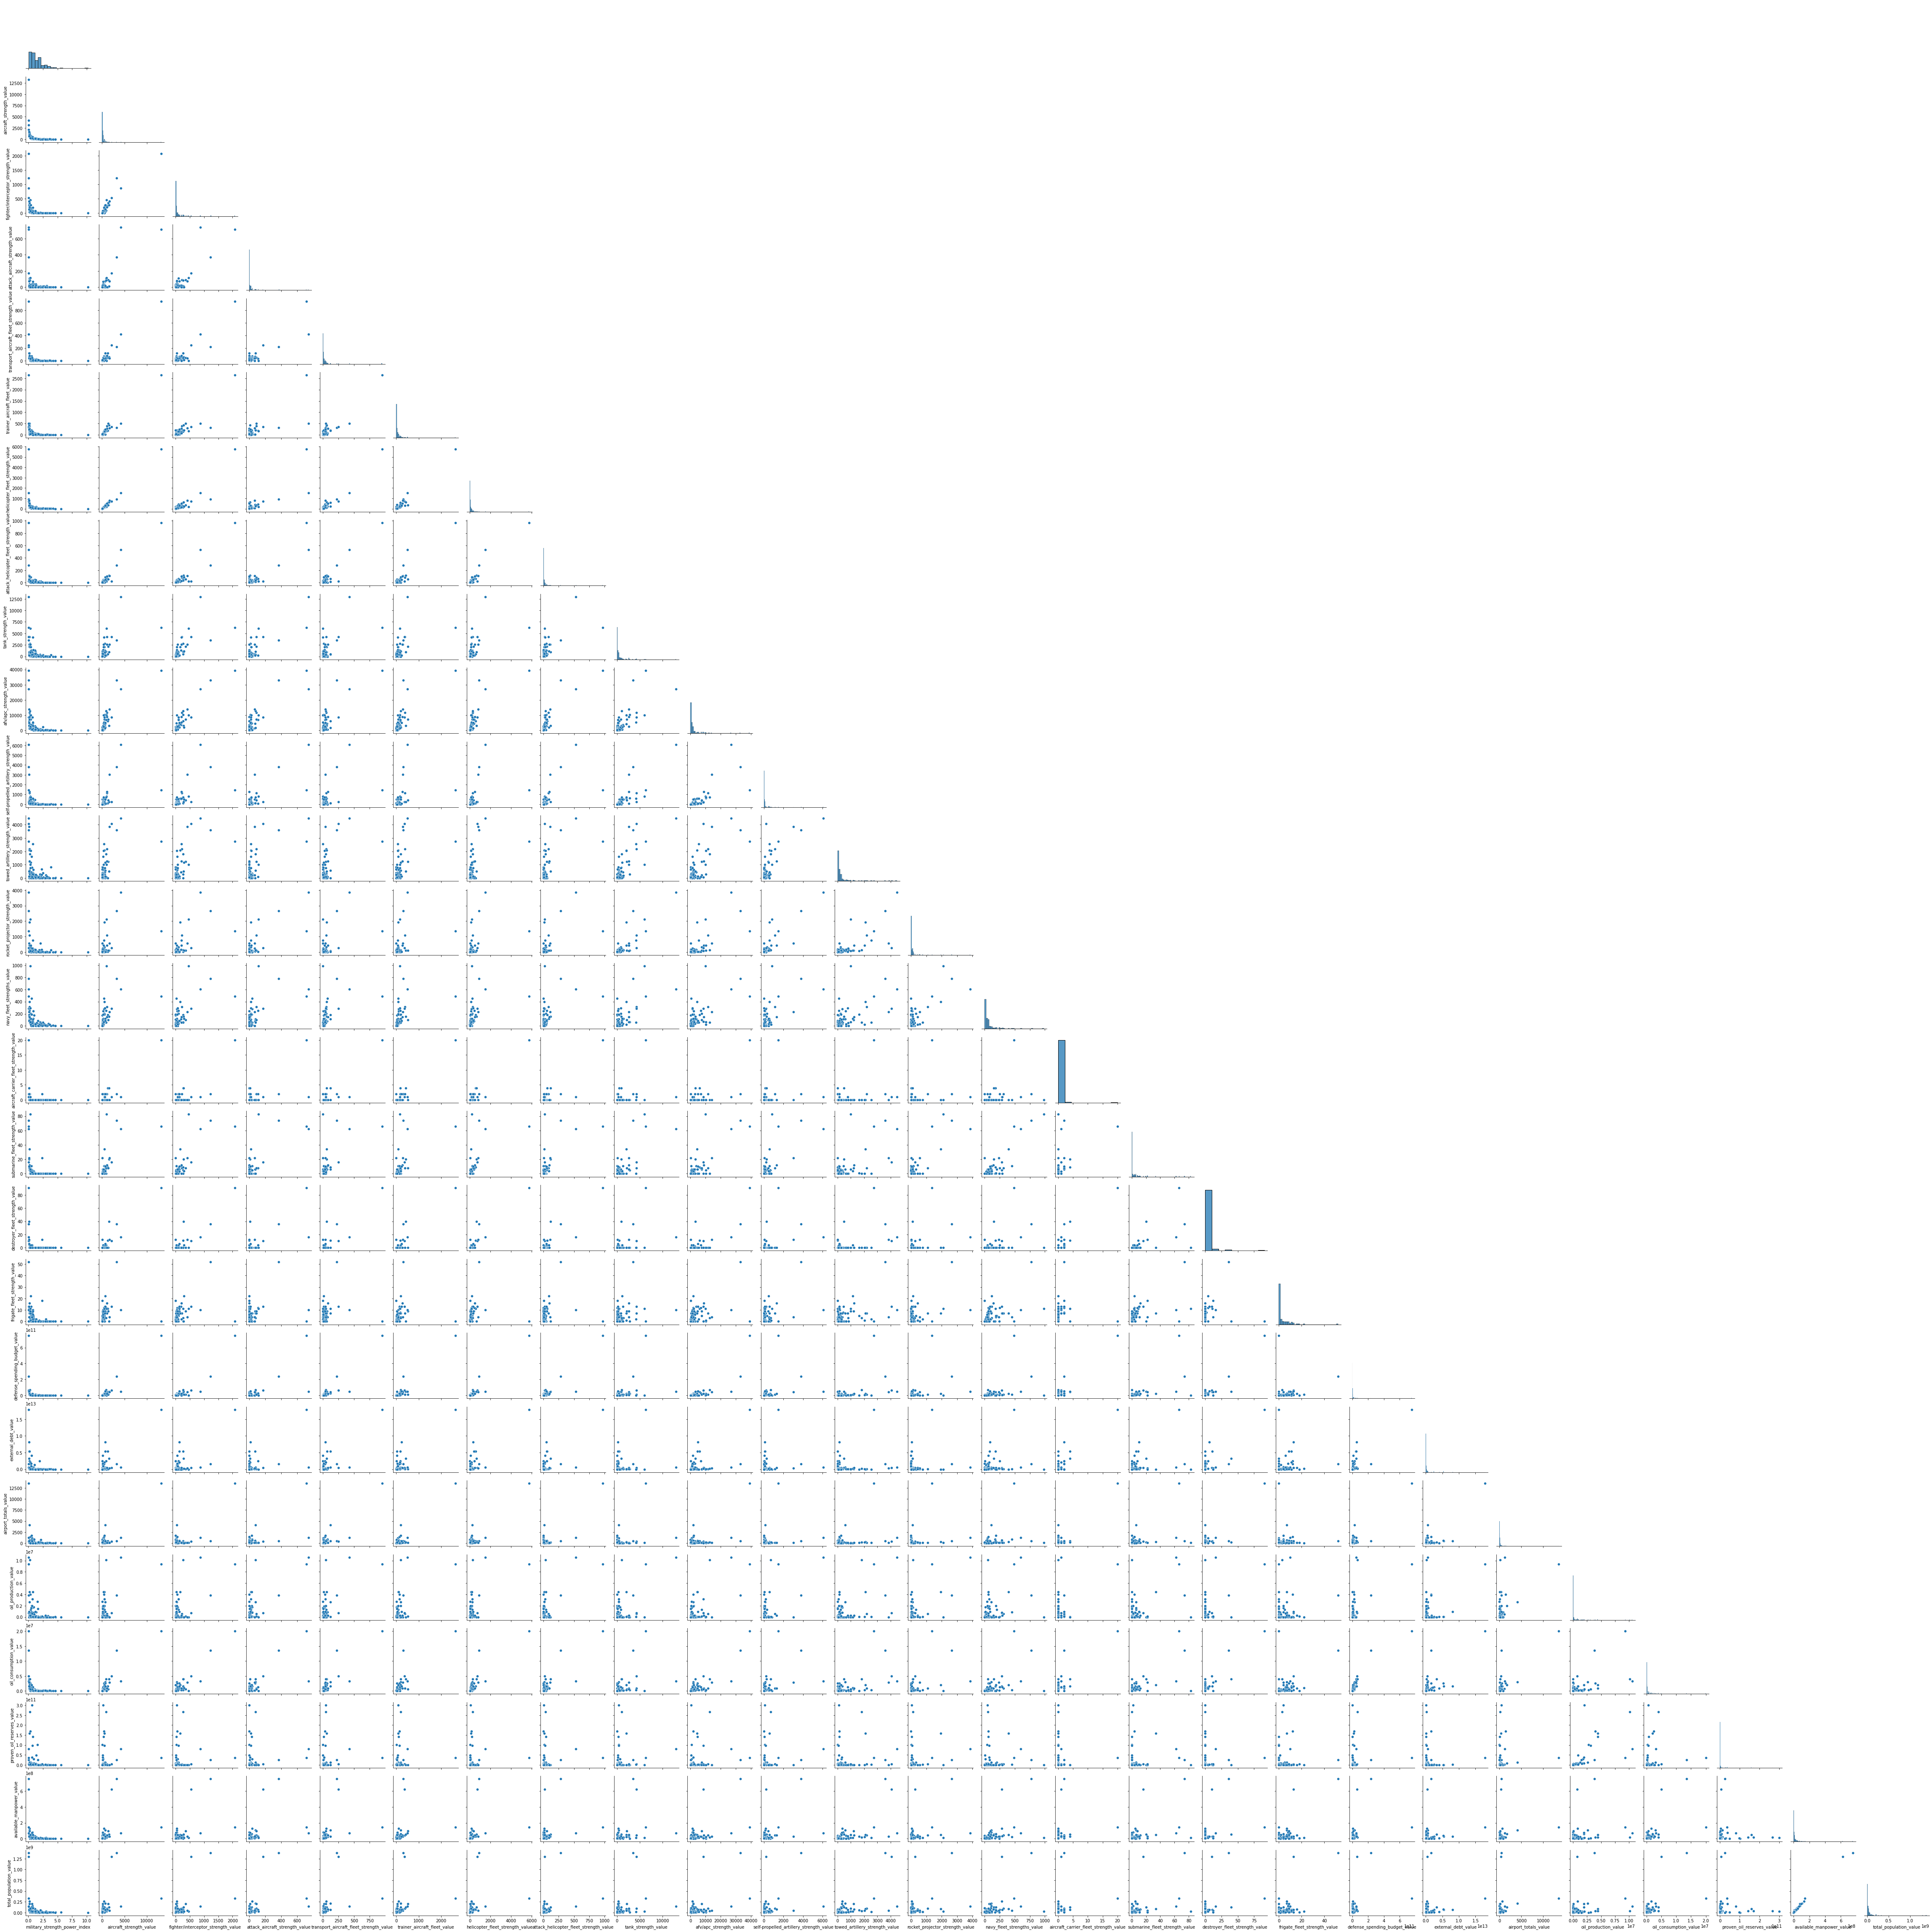

In [56]:
sns.pairplot(df, palette="inferno", corner=True);

<ipython-input-59-4b2739b95f01>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (22,6))


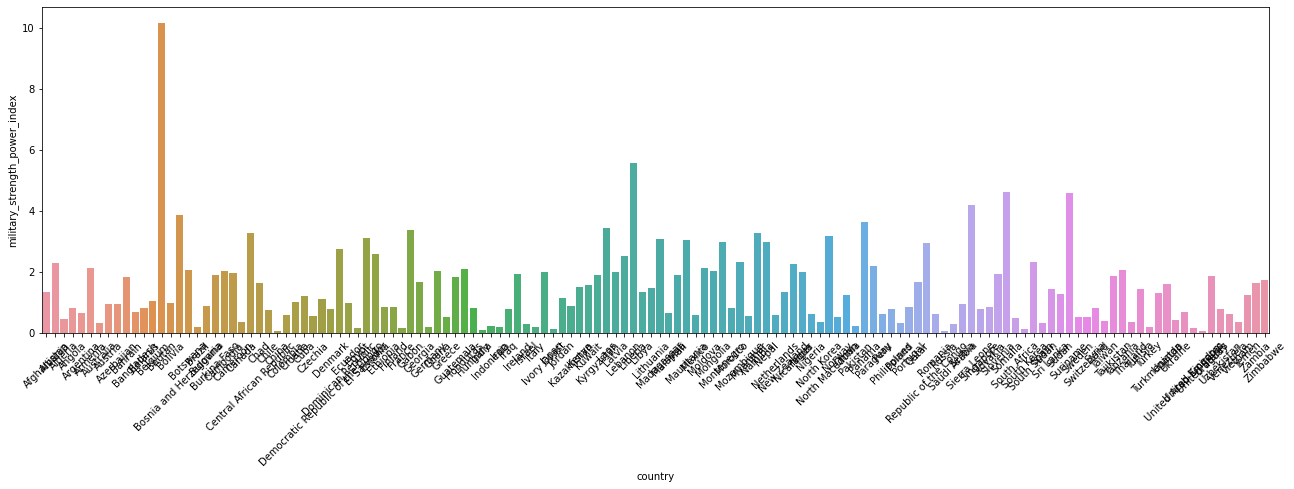

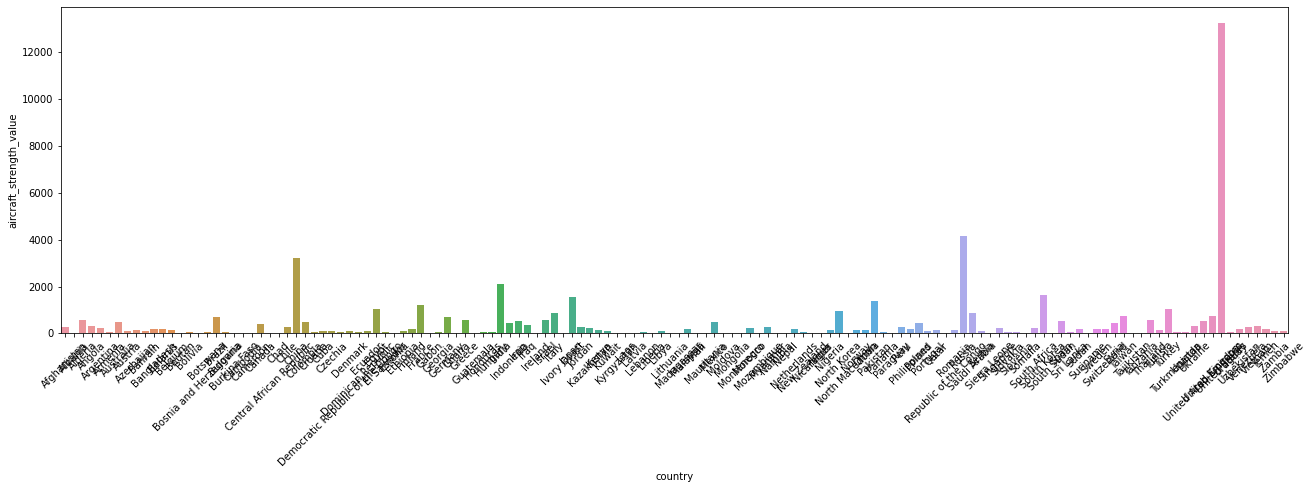

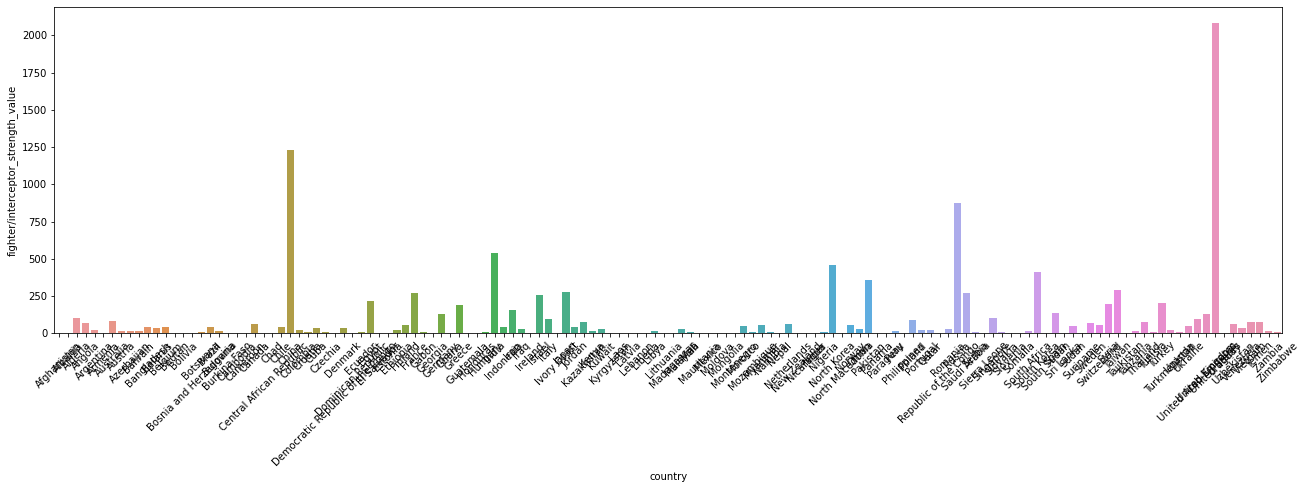

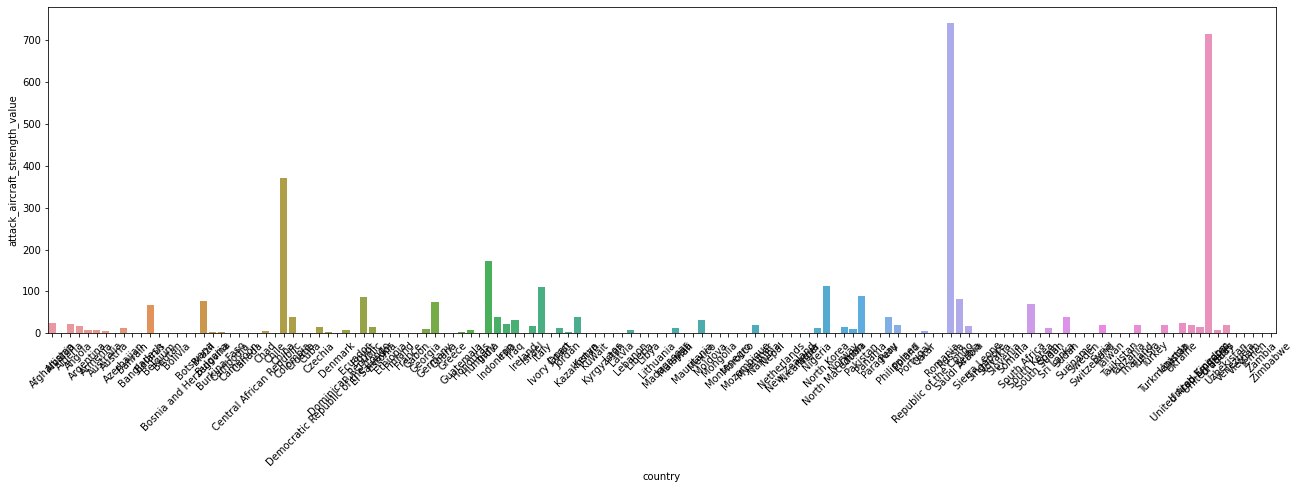

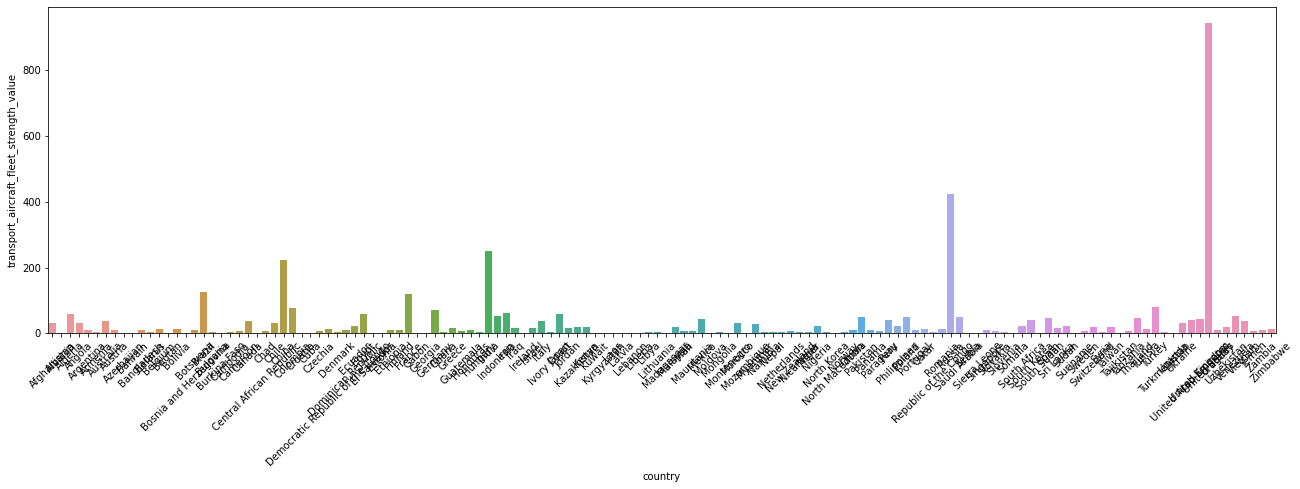

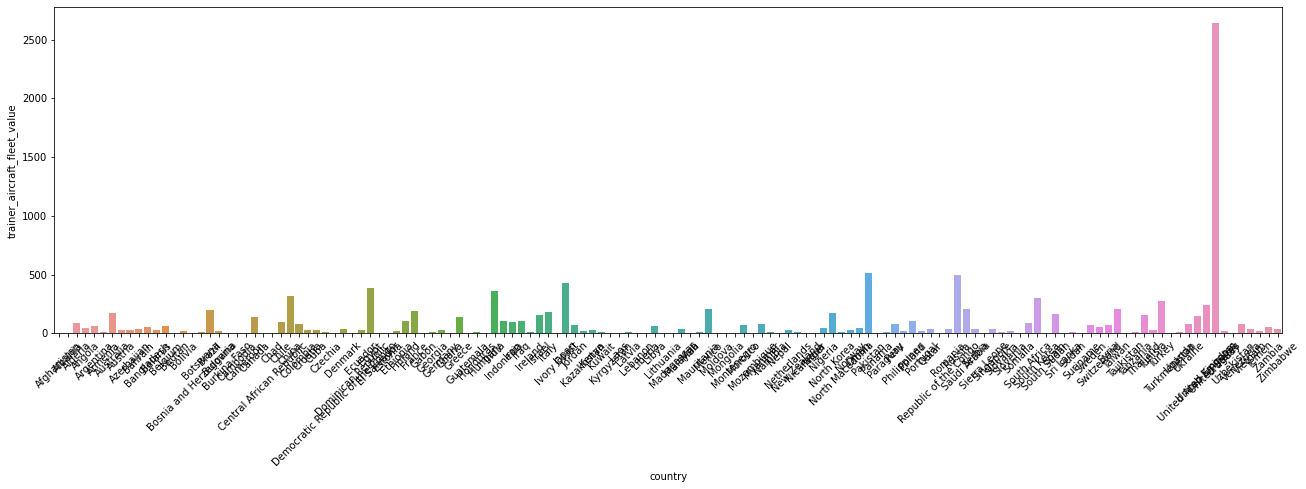

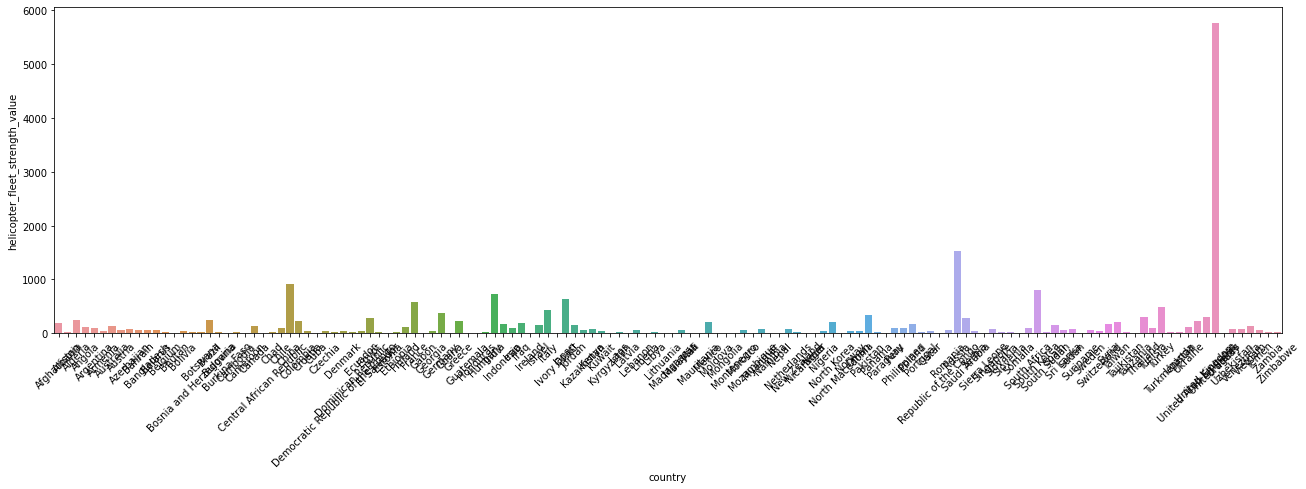

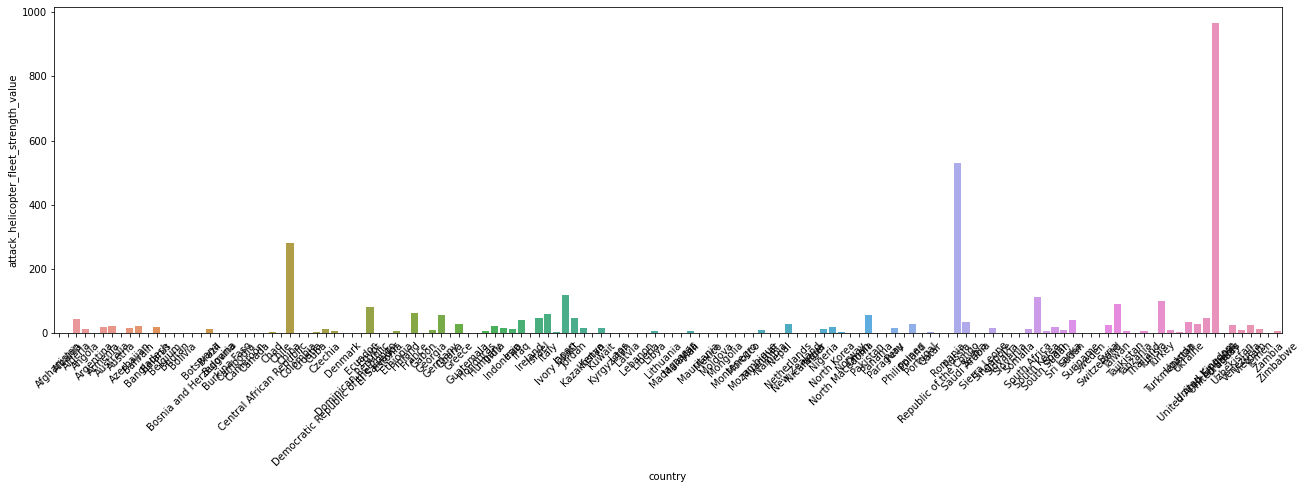

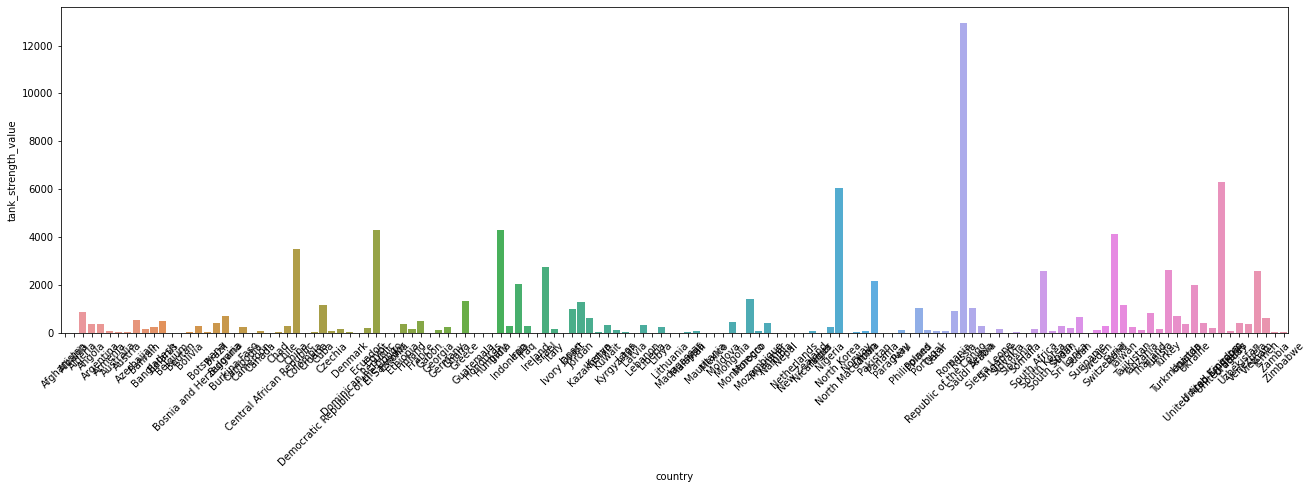

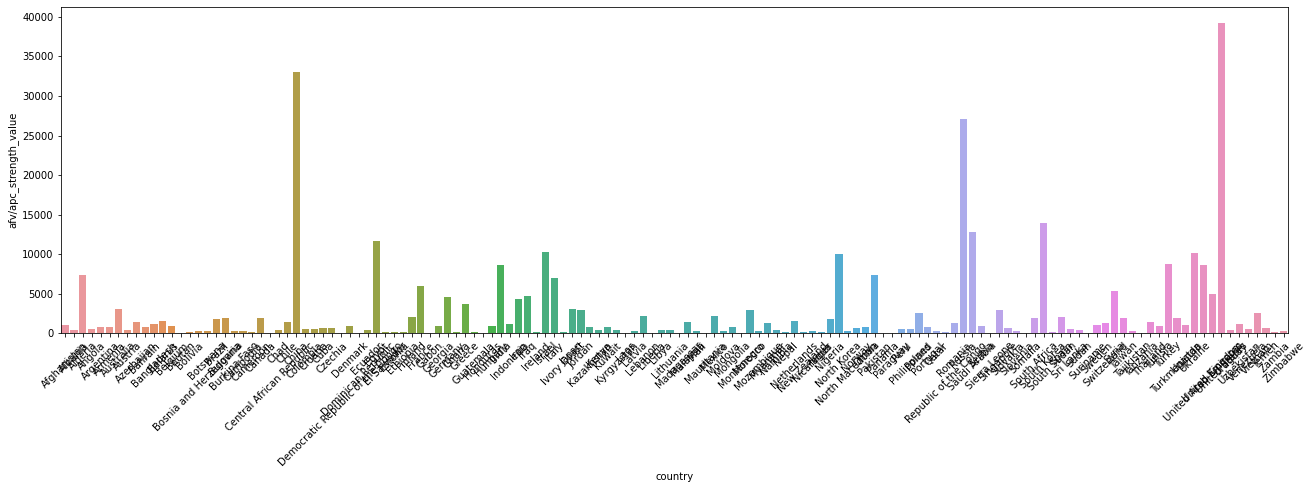

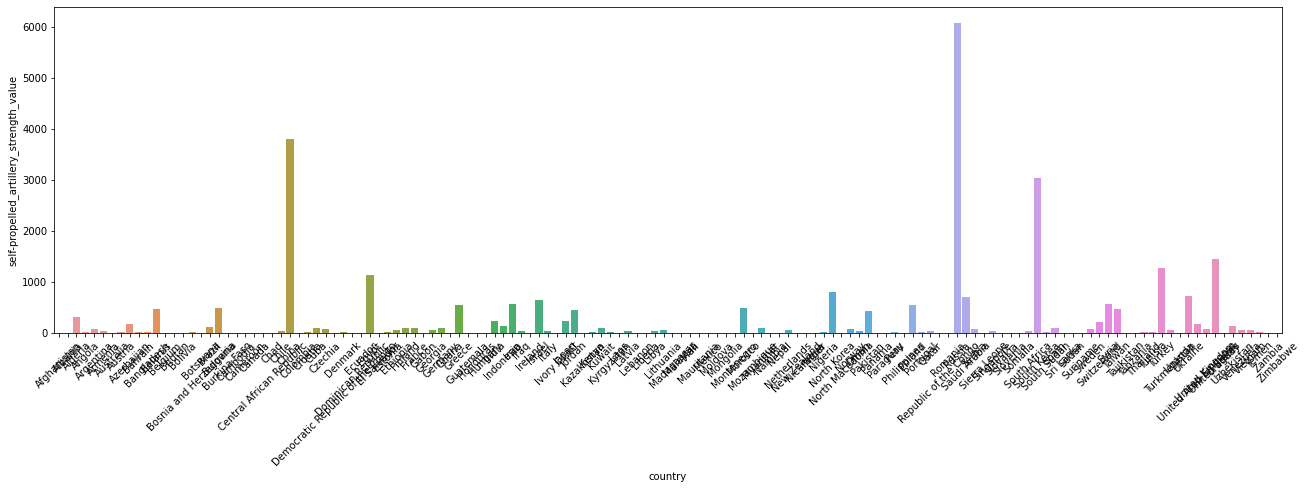

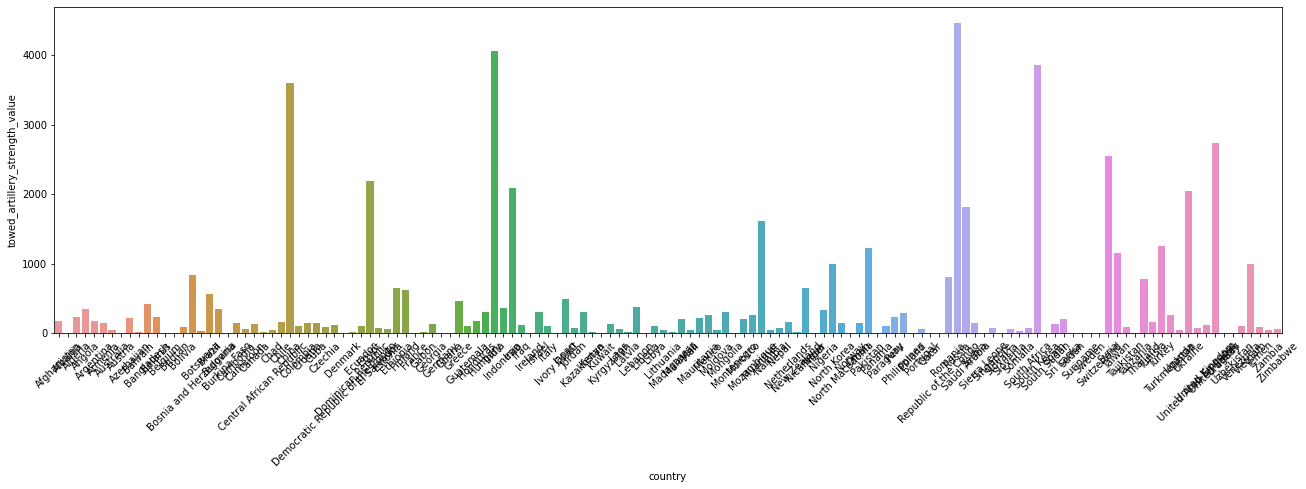

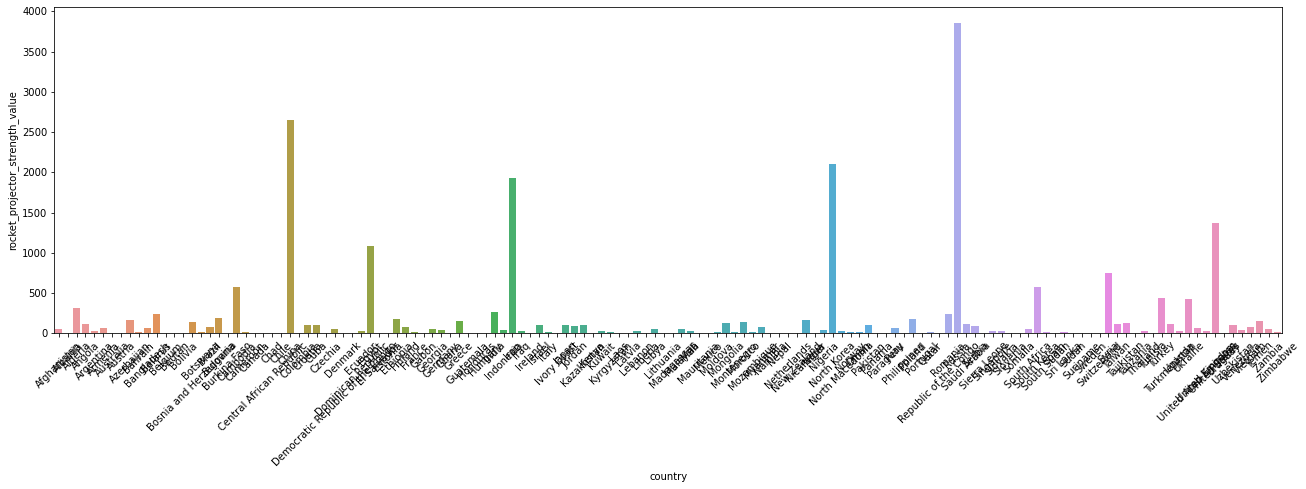

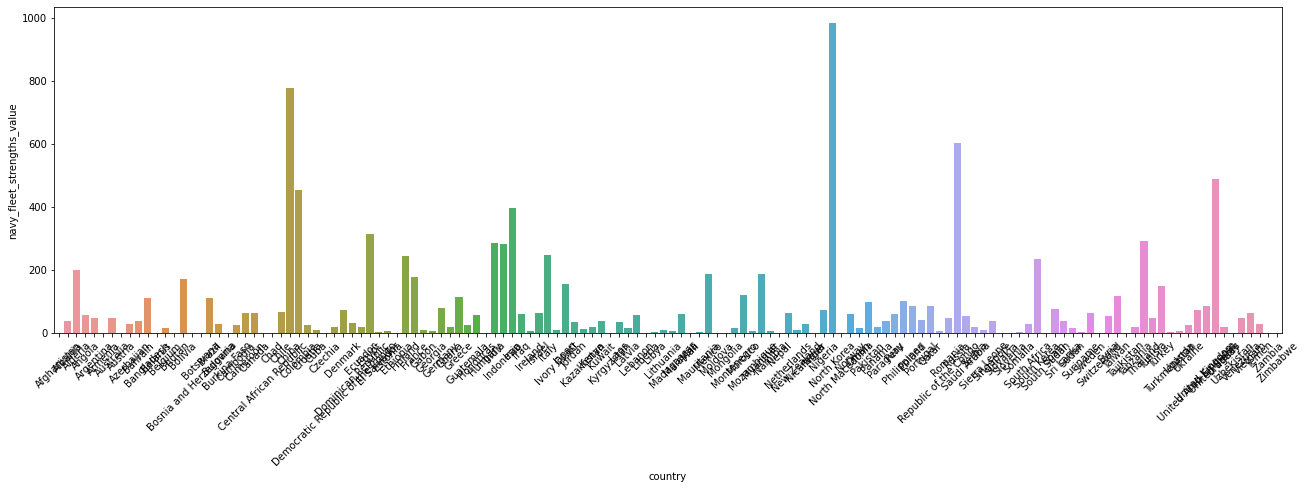

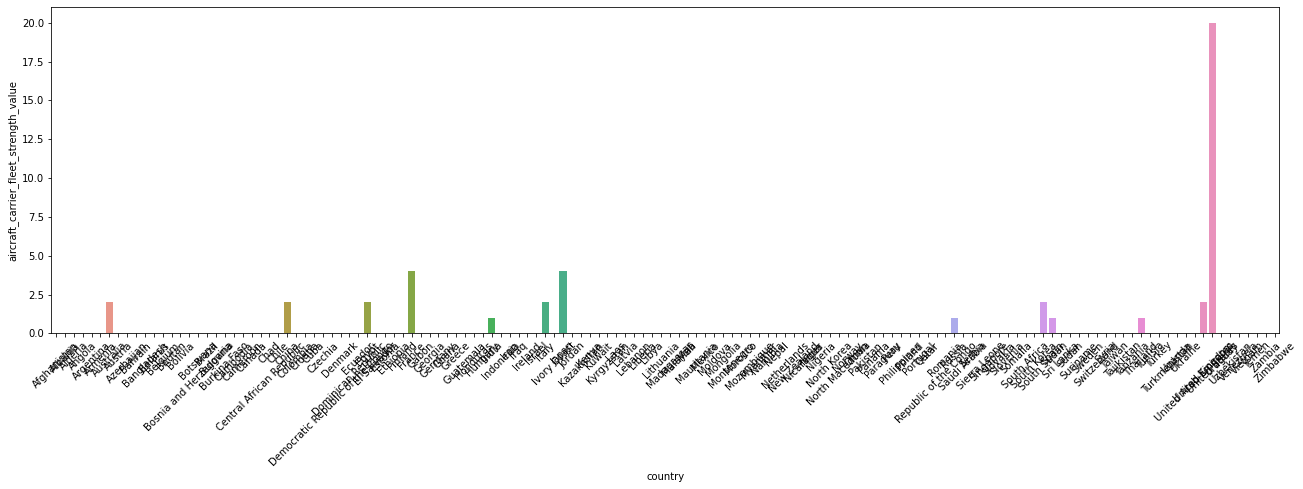

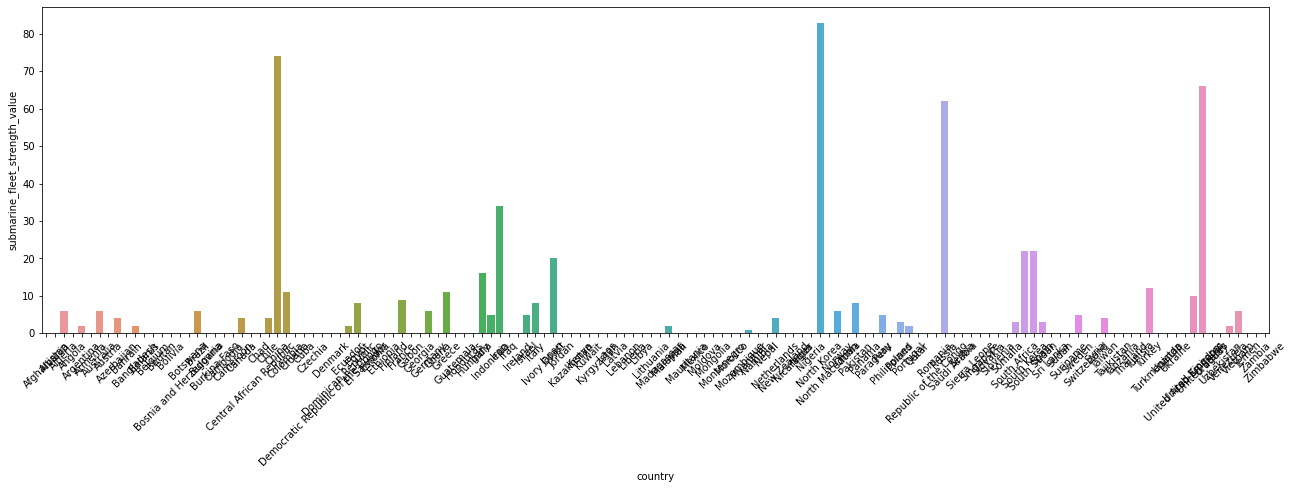

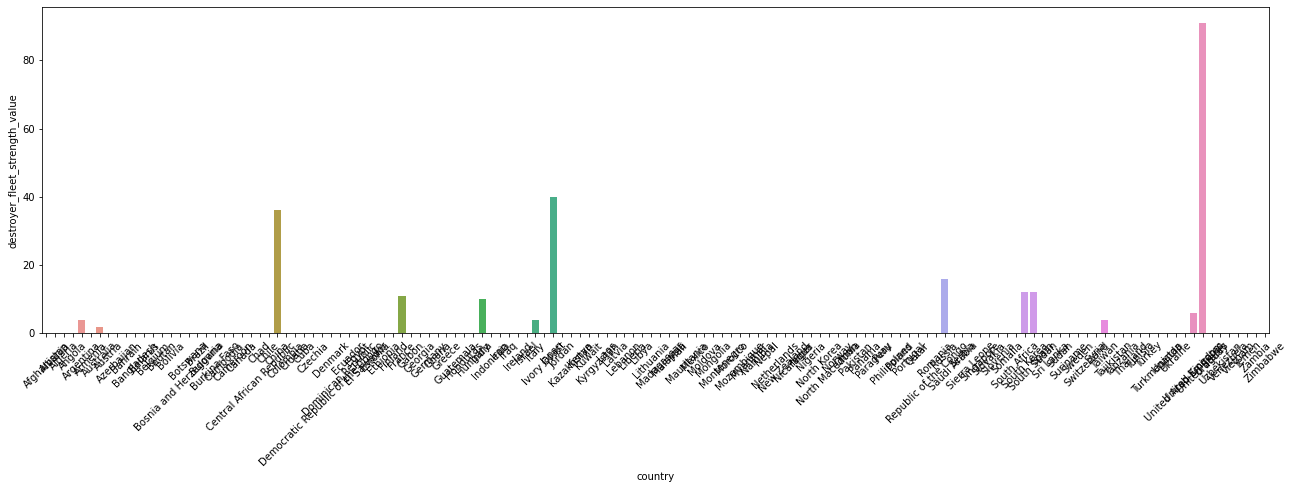

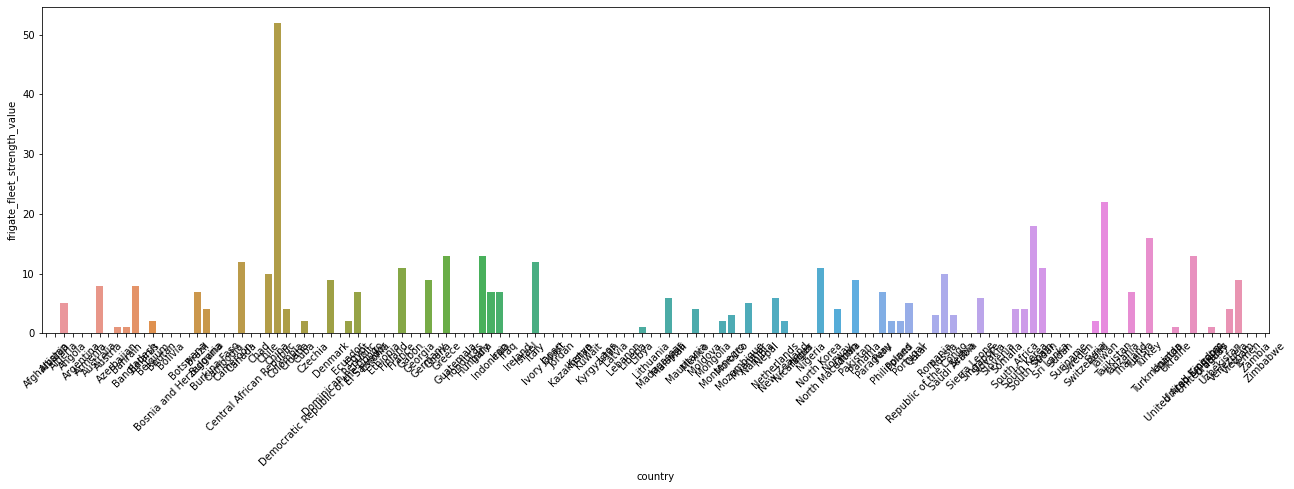

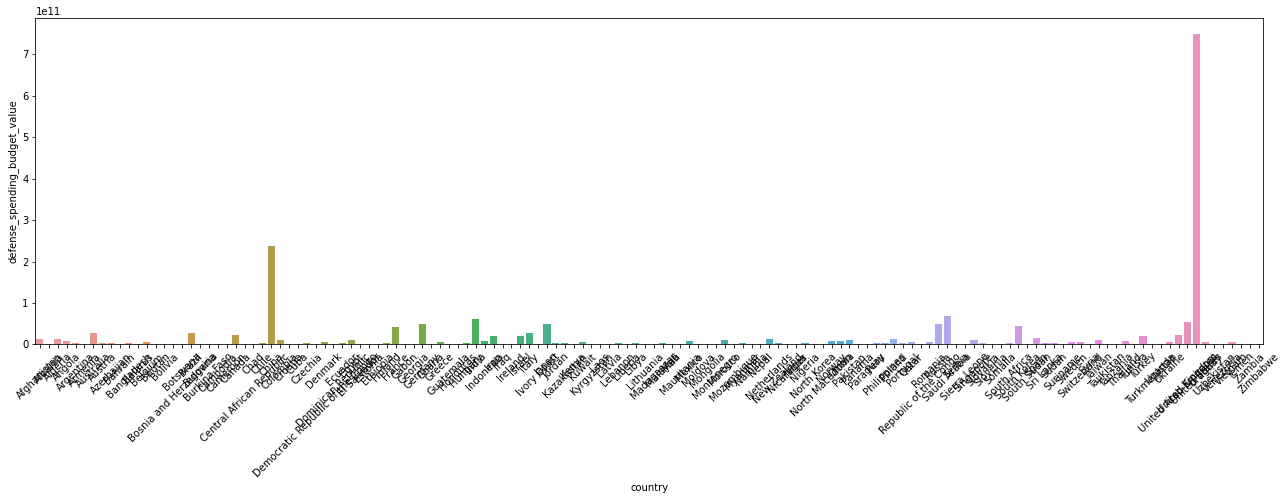

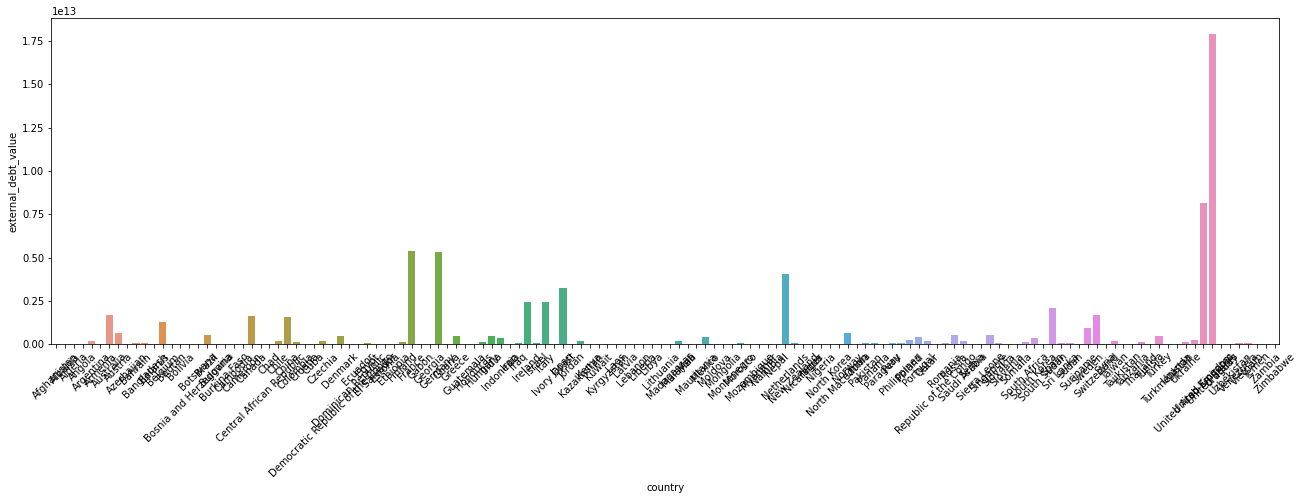

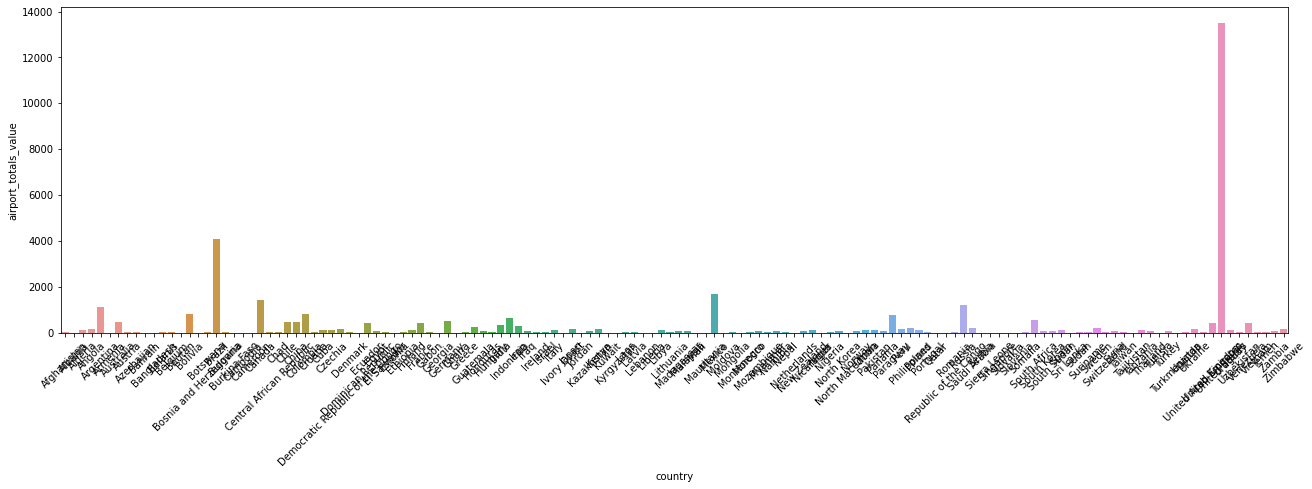

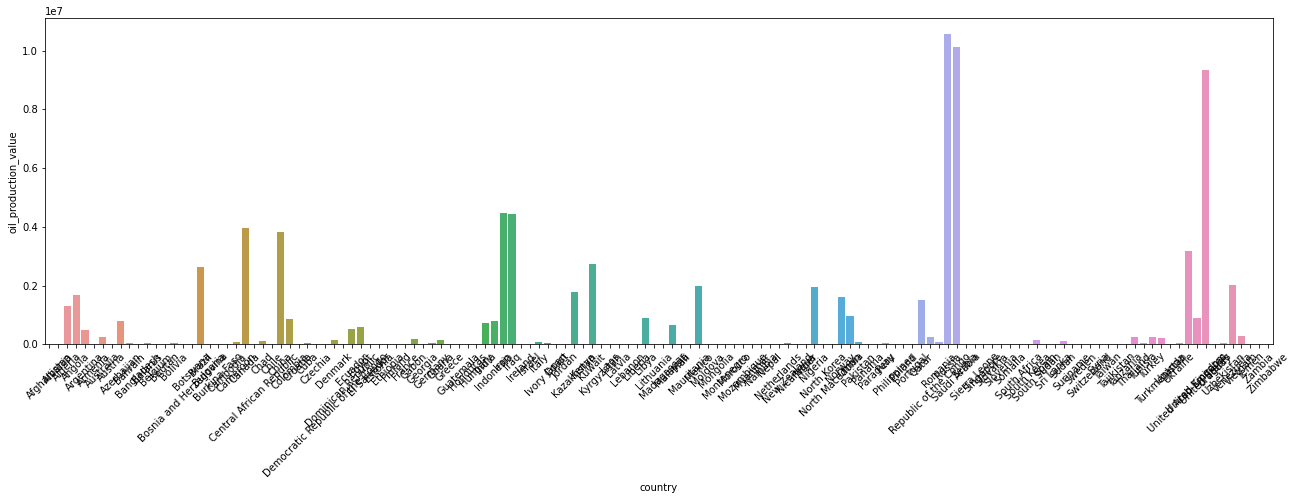

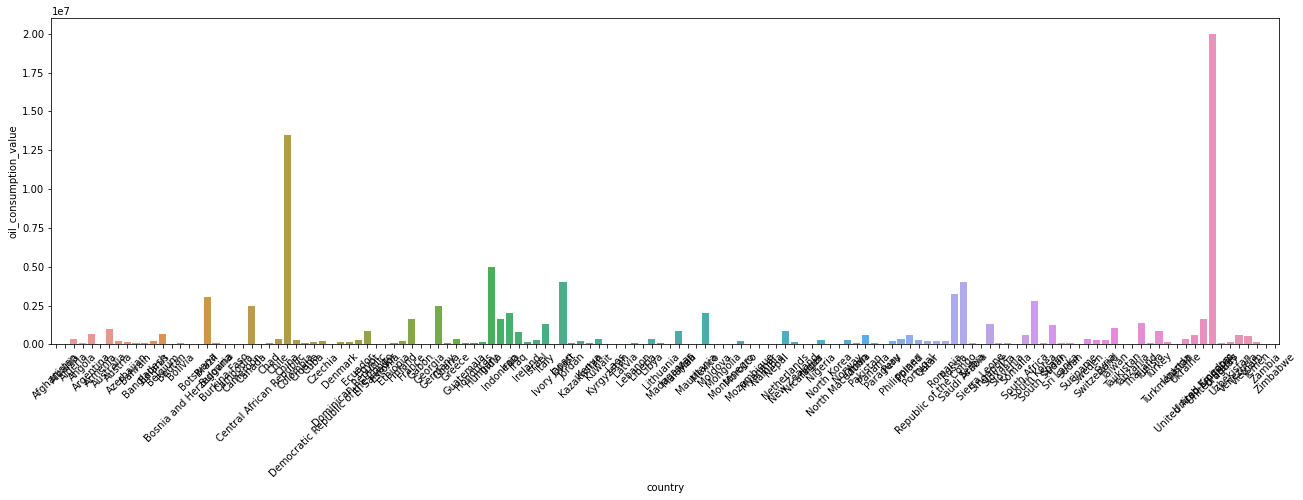

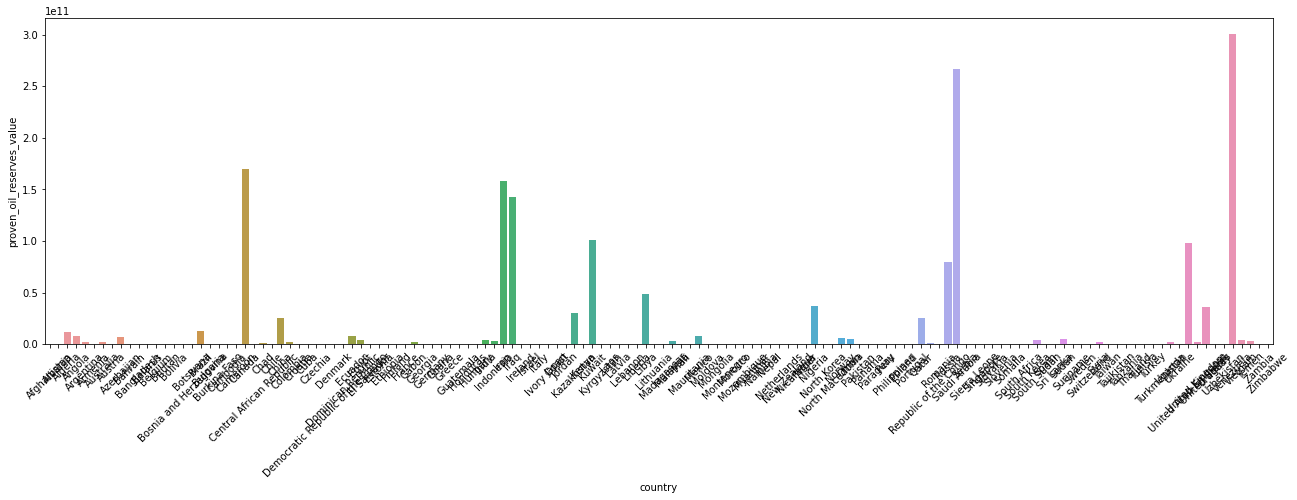

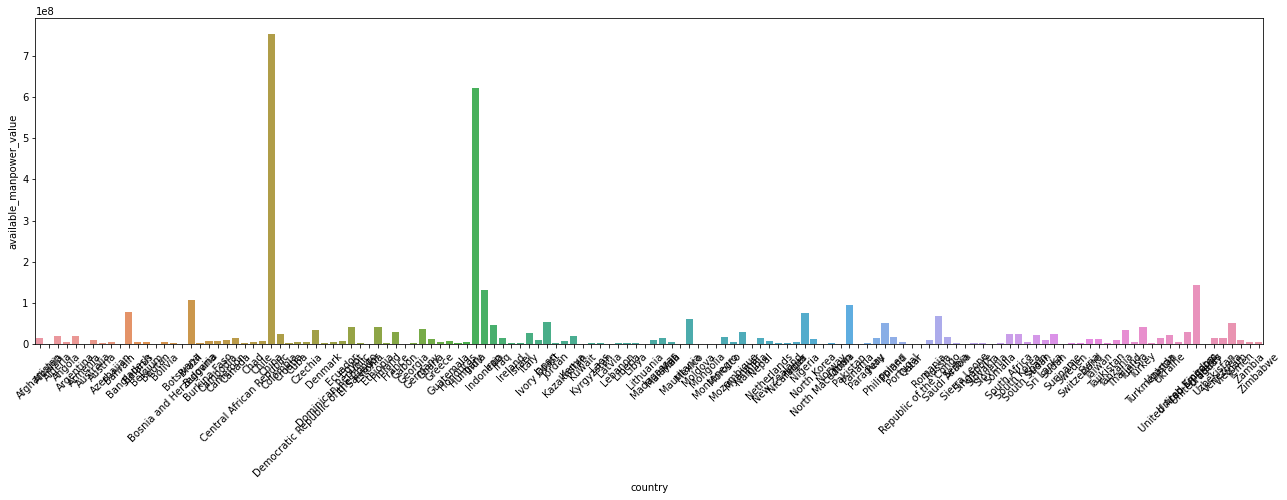

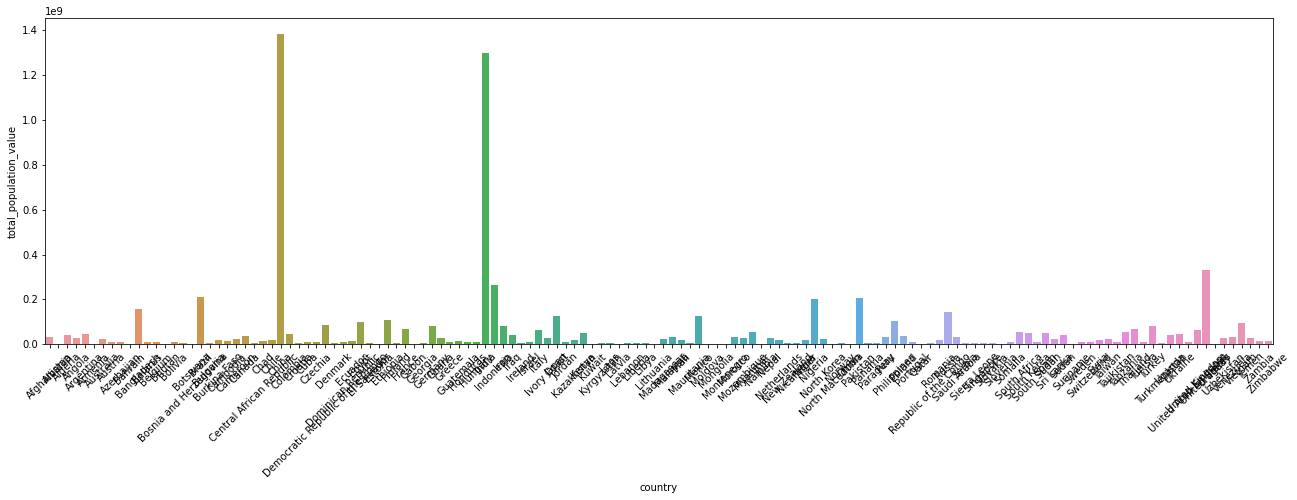

In [59]:
for col in df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = df[col], x = df.index, data = df)
    plt.xticks(rotation = 45);

## Decriptive statistics

In [60]:
df.describe().T

count          mean           std  \
military_strength_power_index            138.0  1.460716e+00  1.324018e+00   
aircraft_strength_value                  138.0  3.884710e+02  1.231982e+03   
fighter/interceptor_strength_value       138.0  8.156522e+01  2.303248e+02   
attack_aircraft_strength_value           138.0  2.576087e+01  9.452822e+01   
transport_aircraft_fleet_strength_value  138.0  3.023188e+01  9.233044e+01   
trainer_aircraft_fleet_value             138.0  8.283333e+01  2.408037e+02   
helicopter_fleet_strength_value          138.0  1.540652e+02  5.201836e+02   
attack_helicopter_fleet_strength_value   138.0  2.562319e+01  9.732609e+01   
tank_strength_value                      138.0  6.465652e+02  1.515464e+03   
afv/apc_strength_value                   138.0  2.485696e+03  5.410546e+03   
self-propelled_artillery_strength_value  138.0  2.121594e+02  6.880290e+02   
towed_artillery_strength_value           138.0  3.939783e+02  8.057817e+02   
rocket_projector_strength_value          138.0  1.569348e+02  4.843810e+02   
navy_fleet_strengths_value               138.0  7.636232e+01  1.408220e+02   
aircraft_carrier_fleet_strength_value    138.0  3.188406e-01  1.804235e+00   
submarine_fleet_strength_value           138.0  4.159420e+00  1.271946e+01   
destroyer_fleet_strength_value           138.0  1.797101e+00  9.195492e+00   
frigate_fleet_strength_value             138.0  2.963768e+00  6.052579e+00   
defense_spending_budget_value            138.0  1.399363e+10  6.731189e+10   
external_debt_value                      138.0  5.194983e+11  1.847252e+12   
airport_totals_value                     138.0  2.900435e+02  1.212967e+03   
oil_production_value                     138.0  5.855524e+05  1.667139e+06   
oil_consumption_value                    138.0  7.020187e+05  2.168810e+06   
proven_oil_reserves_value                138.0  1.194412e+10  4.275090e+10   
available_manpower_value                 138.0  2.544297e+07  8.450698e+07   
total_population_value                   138.0  5.318058e+07  1.651090e+08   

                                                  min           25%  \
military_strength_power_index            6.060000e-02  5.748000e-01   
aircraft_strength_value                  0.000000e+00  3.300000e+01   
fighter/interceptor_strength_value       0.000000e+00  0.000000e+00   
attack_aircraft_strength_value           0.000000e+00  0.000000e+00   
transport_aircraft_fleet_strength_value  0.000000e+00  3.000000e+00   
trainer_aircraft_fleet_value             0.000000e+00  4.250000e+00   
helicopter_fleet_strength_value          0.000000e+00  1.525000e+01   
attack_helicopter_fleet_strength_value   0.000000e+00  0.000000e+00   
tank_strength_value                      0.000000e+00  1.925000e+01   
afv/apc_strength_value                   0.000000e+00  2.502500e+02   
self-propelled_artillery_strength_value  0.000000e+00  0.000000e+00   
towed_artillery_strength_value           0.000000e+00  2.425000e+01   
rocket_projector_strength_value          0.000000e+00  0.000000e+00   
navy_fleet_strengths_value               0.000000e+00  5.250000e+00   
aircraft_carrier_fleet_strength_value    0.000000e+00  0.000000e+00   
submarine_fleet_strength_value           0.000000e+00  0.000000e+00   
destroyer_fleet_strength_value           0.000000e+00  0.000000e+00   
frigate_fleet_strength_value             0.000000e+00  0.000000e+00   
defense_spending_budget_value            1.300000e+07  3.255000e+08   
external_debt_value                      5.394000e+08  9.361500e+09   
airport_totals_value                     2.000000e+00  3.350000e+01   
oil_production_value                     0.000000e+00  0.000000e+00   
oil_consumption_value                    2.000000e+03  3.250000e+04   
proven_oil_reserves_value                0.000000e+00  0.000000e+00   
available_manpower_value                 1.327400e+05  2.618384e+06   
total_population_value                   5.979270e+05  5.819450e+06   

                

## Data Preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [62]:
df1 = df.copy()

In [63]:
df1.reset_index(inplace=True)

In [64]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                         1.3444                    260.0   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                 0.0                            25.0   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                     30.0                           0.0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            187.0                                     0.0   

   tank_strength_value  ...  destroyer_fleet_strength_value  \
0                  0.0  ...                             0.0   

   frigate_fleet_strength_value  defense_spending_budget_value  \
0                           0.0                   1.200000e+10   

   external_debt_value  airport_totals_value  oil_production_value  \
0         2.840000e+09                  43.0                   0.0   

   oil_consumption_value  proven_oil_reserves_value  available_manpower_value  \
0                 5500.0                        0.0                14325743.0   

   total_population_value  
0              34940837.0  

[1 rows x 27 columns]

In [65]:
X = df1.drop(["country"], axis = 1)

In [66]:
scaler = scale

In [67]:
X_scaled = pd.DataFrame(scaler(X))

In [68]:
X_scaled.head(1)

0        1         2         3         4        5         6   \
0 -0.088171 -0.10466 -0.355421 -0.008078 -0.002521 -0.34524  0.063544   

         7         8         9   ...        16        17        18        19  \
0 -0.264231 -0.428199 -0.264092  ... -0.196145 -0.491454 -0.029726 -0.280709   

         20        21        22        23        24        25  
0 -0.204411 -0.352511 -0.322322 -0.280406 -0.132033 -0.110873  

[1 rows x 26 columns]

In [69]:
X_scaled.shape

(138, 26)

# Modelling

In [70]:
K_means_model = KMeans(random_state = 101)

In [71]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [80]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

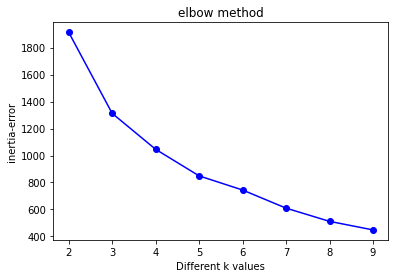

In [81]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [82]:
ssd # sum of squared distance

[1913.4825726106822,
 1312.3964106007525,
 1045.867849231991,
 849.0017491804559,
 744.2002246322533,
 609.8487829843651,
 511.8713984426132,
 448.49563968771315]

In [83]:
pd.Series(ssd).diff()

0           NaN
1   -601.086162
2   -266.528561
3   -196.866100
4   -104.801525
5   -134.351442
6    -97.977385
7    -63.375759
dtype: float64

In [84]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1         NaN
2  601.086162
3  266.528561
4  196.866100
5  104.801525
6  134.351442
7   97.977385
8   63.375759

<AxesSubplot:>

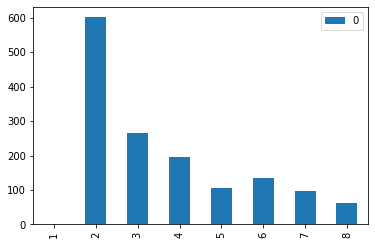

In [85]:
df1_diff.plot(kind='bar')

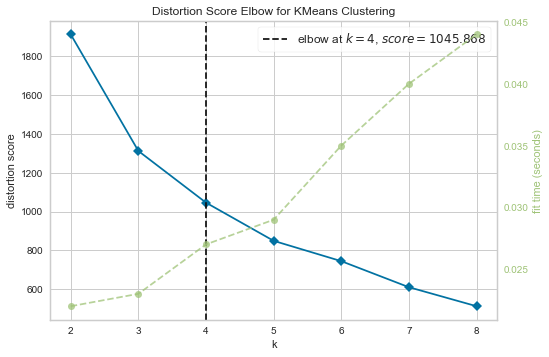

In [86]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [87]:
model = KMeans(n_clusters = 4, random_state = 101)
model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [88]:

model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [89]:
X["clusters"] = model.fit_predict(X_scaled)

In [90]:
X.head()

military_strength_power_index  aircraft_strength_value  \
0                         1.3444                    260.0   
1                         2.3137                     19.0   
2                         0.4659                    551.0   
3                         0.8379                    295.0   
4                         0.6521                    227.0   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                 0.0                            25.0   
1                                 0.0                             0.0   
2                               103.0                            22.0   
3                                72.0                            18.0   
4                                24.0                             7.0   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                     30.0                           0.0   
1                                      0.0                           0.0   
2                                     59.0                          87.0   
3                                     30.0                          47.0   
4                                      9.0                          64.0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            187.0                                     0.0   
1                             19.0                                     0.0   
2                            257.0                                    45.0   
3                            126.0                                    15.0   
4                            100.0                                     0.0   

   tank_strength_value  afv/apc_strength_value  ...  \
0                  0.0                  1062.0  ...   
1                  0.0                   467.0  ...   
2                880.0                  7361.0  ...   
3                379.0                   595.0  ...   
4                370.0                   739.0  ...   

   frigate_fleet_strength_value  defense_spending_budget_value  \
0                           0.0                   1.200000e+10   
1                           0.0                   2.500000e+08   
2                           5.0                   1.300000e+10   
3                           0.0                   7.000000e+09   
4                           0.0                   4.200000e+09   

   external_debt_value  airport_totals_value  oil_production_value  \
0         2.840000e+09                  43.0                   0.0   
1         9.505000e+09                   4.0               16000.0   
2         6.260000e+09                 157.0             1306000.0   
3         4.208000e+10                 176.0             1666000.0   
4         2.149000e+11                1138.0              479400.0   

   oil_consumption_value  proven_oil_reserves_value  available_manpower_value  \
0                 5500.0               0.000000e+00                14325743.0   
1                42500.0               1.683000e+08                 1519438.0   
2               325000.0               1.220000e+10                20741263.0   
3                82300.0               8.273000e+09                 6244205.0   
4               685000.0               2.185000e+09                20179430.0   

   total_population_value  clusters  
0              34940837.0         3  
1               3057220.0         3  
2              41657488.0         0  
3              30355880.0         3  
4              44694198.0         3  

[5 rows x 27 columns]

In [91]:
X.clusters.value_counts()

3    112
0     23
1      2
2      1
Name: clusters, dtype: int64

In [92]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                         1.3444                    260.0   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                 0.0                            25.0   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                     30.0                           0.0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            187.0                                     0.0   

   tank_strength_value  ...  destroyer_fleet_strength_value  \
0                  0.0  ...                             0.0   

   frigate_fleet_strength_value  defense_spending_budget_value  \
0                           0.0                   1.200000e+10   

   external_debt_value  airport_totals_value  oil_production_value  \
0         2.840000e+09                  43.0                   0.0   

   oil_consumption_value  proven_oil_reserves_value  available_manpower_value  \
0                 5500.0                        0.0                14325743.0   

   total_population_value  
0              34940837.0  

[1 rows x 27 columns]

In [93]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)

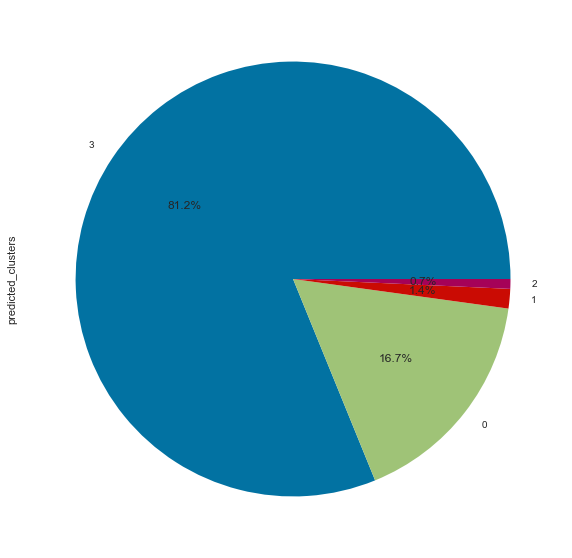

In [94]:
df1["predicted_clusters"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

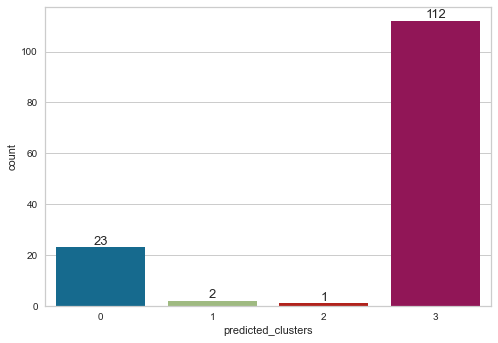

In [95]:
df1.predicted_clusters.value_counts()

sns.countplot(x=df1["predicted_clusters"], data=df1)
for index,value in enumerate(df1.predicted_clusters.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [96]:
df1[df1["predicted_clusters"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
49            India                         0.0953
57            Japan                         0.1501
110     South Korea                         0.1509
40           France                         0.1702
129  United Kingdom                         0.1717
35            Egypt                         0.1872
17           Brazil                         0.1988
124          Turkey                         0.2098
55            Italy                         0.2111
43          Germany                         0.2186
51             Iran                         0.2191
91         Pakistan                         0.2364
50        Indonesia                         0.2544
102    Saudi Arabia                         0.3034
134         Vietnam                         0.3559
122        Thailand                         0.3571
22           Canada                         0.3712
87      North Korea                         0.3718
119          Taiwan                         0.4008
127         Ukraine                         0.4457
2           Algeria                         0.4659
45           Greece                         0.5311
118           Syria                         0.8241

In [97]:
df1[df1["predicted_clusters"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
101  Russia                         0.0681
26    China                         0.0691

In [98]:
df1[df1["predicted_clusters"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
130  United States                         0.0606

In [99]:
df1[df1["predicted_clusters"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
54         Israel                         0.3111
6       Australia                         0.3225
112         Spain                         0.3388
96         Poland                         0.3397
109  South Africa                         0.4985
..            ...                            ...
104  Sierra Leone                         4.2063
115      Suriname                         4.6042
108       Somalia                         4.6404
66        Liberia                         5.5737
13         Bhutan                        10.1681

[112 rows x 2 columns]

### Evaluate 

In [100]:
df1['military_strength_power_index'].describe()

count    138.000000
mean       1.460716
std        1.324018
min        0.060600
25%        0.574800
50%        1.034100
75%        2.021525
max       10.168100
Name: military_strength_power_index, dtype: float64

In [101]:
df1['military_strength_power_index'].value_counts().index.sort_values()

Float64Index([ 0.0606,  0.0681,  0.0691,  0.0953,  0.1501,  0.1509,  0.1702,
               0.1717,  0.1872,  0.1988,
              ...
               3.2889,  3.3736,  3.4433,  3.6537,  3.8586,  4.2063,  4.6042,
               4.6404,  5.5737, 10.1681],
             dtype='float64', length=138)

<AxesSubplot:ylabel='Frequency'>

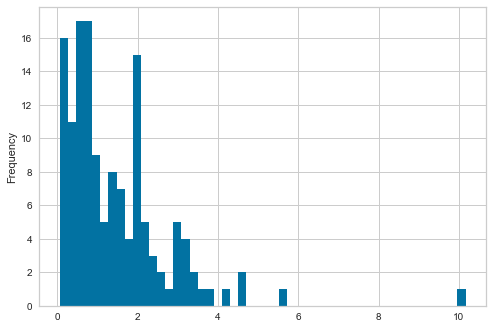

In [109]:
df1['military_strength_power_index'].plot(kind='hist', bins=50)

In [110]:
def classification(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return 1
    elif 0.065 < military_strength_power_index <= 0.1:
        return 2
    elif 0.1 < military_strength_power_index <= 0.5:
        return 3
    else:
        return 0

In [111]:
df1['classification'] = df1['military_strength_power_index'].apply(classification)

In [112]:
df1.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                         1.3444                    260.0   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                 0.0                            25.0   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                     30.0                           0.0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            187.0                                     0.0   

   tank_strength_value  ...  defense_spending_budget_value  \
0                  0.0  ...                   1.200000e+10   

   external_debt_value  airport_totals_value  oil_production_value  \
0         2.840000e+09                  43.0                   0.0   

   oil_consumption_value  proven_oil_reserves_value  available_manpower_value  \
0                 5500.0                        0.0                14325743.0   

   total_population_value  predicted_clusters  classification  
0              34940837.0                   3               0  

[1 rows x 29 columns]

In [113]:
df1['classification'].value_counts()

0    109
3     25
2      3
1      1
Name: classification, dtype: int64

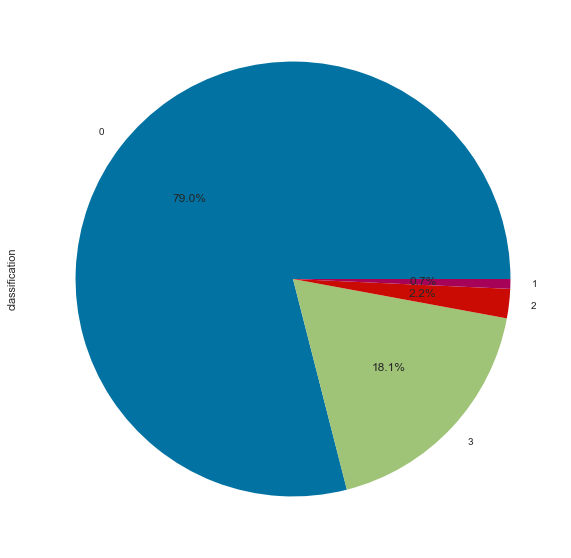

In [114]:
df1["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

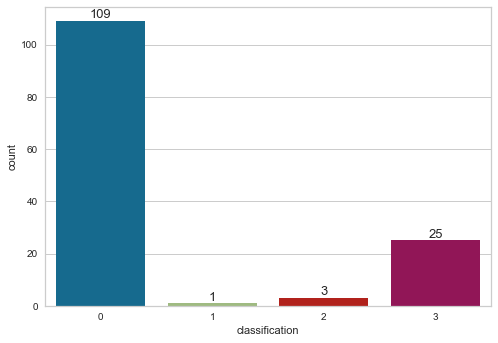

In [115]:
df1.classification.value_counts()

sns.countplot(x=df1["classification"], data=df1)
for index,value in enumerate(df1.classification.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [116]:
df1[df1["classification"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
101  Russia                         0.0681
26    China                         0.0691
49    India                         0.0953

In [117]:
len(df1[df1["classification"]==2]["country"])

3

In [118]:
df1[df1["classification"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
130  United States                         0.0606

In [119]:
len(df1[df1["classification"]==1]["country"])

1

In [120]:
df1[df1["classification"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
117   Switzerland                         0.5259
89         Norway                         0.5277
116        Sweden                         0.5304
45         Greece                         0.5311
30        Czechia                         0.5531
..            ...                            ...
104  Sierra Leone                         4.2063
115      Suriname                         4.6042
108       Somalia                         4.6404
66        Liberia                         5.5737
13         Bhutan                        10.1681

[109 rows x 2 columns]

In [121]:
len(df1[df1["classification"]==0]["country"])

109

In [122]:
df1[df1["classification"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
57            Japan                         0.1501
110     South Korea                         0.1509
40           France                         0.1702
129  United Kingdom                         0.1717
35            Egypt                         0.1872
17           Brazil                         0.1988
124          Turkey                         0.2098
55            Italy                         0.2111
43          Germany                         0.2186
51             Iran                         0.2191
91         Pakistan                         0.2364
50        Indonesia                         0.2544
102    Saudi Arabia                         0.3034
54           Israel                         0.3111
6         Australia                         0.3225
112           Spain                         0.3388
96           Poland                         0.3397
134         Vietnam                         0.3559
122        Thailand                         0.3571
22           Canada                         0.3712
87      North Korea                         0.3718
119          Taiwan                         0.4008
127         Ukraine                         0.4457
2           Algeria                         0.4659
109    South Africa                         0.4985

In [123]:
len(df1[df1["classification"]==3]["country"])

25

In [124]:

from sklearn.metrics import adjusted_rand_score

In [125]:
df1_end = df1
df1_end

country  military_strength_power_index  aircraft_strength_value  \
0    Afghanistan                         1.3444                    260.0   
1        Albania                         2.3137                     19.0   
2        Algeria                         0.4659                    551.0   
3         Angola                         0.8379                    295.0   
4      Argentina                         0.6521                    227.0   
..           ...                            ...                      ...   
133    Venezuela                         0.6449                    260.0   
134      Vietnam                         0.3559                    293.0   
135        Yemen                         1.2412                    169.0   
136       Zambia                         1.6464                    108.0   
137     Zimbabwe                         1.7577                     90.0   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0.0                            25.0   
1                                   0.0                             0.0   
2                                 103.0                            22.0   
3                                  72.0                            18.0   
4                                  24.0                             7.0   
..                                  ...                             ...   
133                                38.0                             0.0   
134                                77.0                             0.0   
135                                77.0                             0.0   
136                                18.0                             0.0   
137                                10.0                             0.0   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30.0                           0.0   
1                                        0.0                           0.0   
2                                       59.0                          87.0   
3                                       30.0                          47.0   
4                                        9.0                          64.0   
..                                       ...                           ...   
133                                     52.0                          82.0   
134                                     38.0                          36.0   
135                                      8.0                          21.0   
136                                     11.0                          52.0   
137                                     14.0                          38.0   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187.0                                     0.0   
1                               19.0                                     0.0   
2                              257.0                                    45.0   
3                              126.0                                    15.0   
4                              100.0                                     0.0   
..                               ...                                     ...   
133                             86.0                                    10.0   
134                            138.0                                    25.0   
135                             61.0                                    14.0   
136                             27.0                                     0.0   
137                             28.0                                     6.0   

     tank_strength_value  ...  defense_spending_budget_value  \
0                    0.0  ...                   1.200000e+10   
1                    0.0  ...                   2.500000e+08   
2                  880.0  ...                   1.300000e+10   
3                  379.0  ...            

In [126]:
df1.predicted_clusters.value_counts()

3    112
0     23
1      2
2      1
Name: predicted_clusters, dtype: int64

In [127]:
df1.classification.value_counts()

0    109
3     25
2      3
1      1
Name: classification, dtype: int64

In [128]:
df1[["classification", "predicted_clusters"]].value_counts()

classification  predicted_clusters
0               3                     107
3               0                      20
                3                       5
0               0                       2
2               1                       2
1               2                       1
2               0                       1
dtype: int64

In [129]:
df1[["country", "classification", "predicted_clusters"]]

country  classification  predicted_clusters
0    Afghanistan               0                   3
1        Albania               0                   3
2        Algeria               3                   0
3         Angola               0                   3
4      Argentina               0                   3
..           ...             ...                 ...
133    Venezuela               0                   3
134      Vietnam               3                   0
135        Yemen               0                   3
136       Zambia               0                   3
137     Zimbabwe               0                   3

[138 rows x 3 columns]

In [130]:
df1[df1["classification"]!=df1["predicted_clusters"]][["country", "classification", "predicted_clusters"]]

country  classification  predicted_clusters
0    Afghanistan               0                   3
1        Albania               0                   3
2        Algeria               3                   0
3         Angola               0                   3
4      Argentina               0                   3
..           ...             ...                 ...
133    Venezuela               0                   3
134      Vietnam               3                   0
135        Yemen               0                   3
136       Zambia               0                   3
137     Zimbabwe               0                   3

[131 rows x 3 columns]

## Hierarchical Clustering

In [131]:
df2 = df.copy()

In [132]:
df2.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                         1.3444                    260.0   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                 0.0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                            25.0   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                     30.0   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                           0.0                            187.0   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                     0.0                  0.0   

             afv/apc_strength_value  ...  destroyer_fleet_strength_value  \
country                              ...                                   
Afghanistan                  1062.0  ...                             0.0   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                           0.0                   1.200000e+10   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan         2.840000e+09                  43.0                   0.0   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan                 5500.0                        0.0   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan                14325743.0              34940837.0  

[1 rows x 26 columns]

In [133]:
X_scaled = scale(df2)

In [134]:
pd.DataFrame(X_scaled)

0         1         2         3         4         5         6   \
0   -0.088171 -0.104660 -0.355421 -0.008078 -0.002521 -0.345240  0.063544   
1    0.646586 -0.300992 -0.355421 -0.273513 -0.328624 -0.345240 -0.260595   
2   -0.754099  0.132405  0.093402 -0.039931  0.312713  0.017366  0.198603   
3   -0.472112 -0.076147 -0.041681 -0.082400 -0.002521 -0.149349 -0.054149   
4   -0.612954 -0.131544 -0.250841 -0.199191 -0.230793 -0.078495 -0.104314   
..        ...       ...       ...       ...       ...       ...       ...   
133 -0.618411 -0.104660 -0.189836 -0.273513  0.236622 -0.003473 -0.131325   
134 -0.837482 -0.077776 -0.019893 -0.273513  0.084440 -0.195196 -0.030996   
135 -0.166399 -0.178794 -0.019893 -0.273513 -0.241663 -0.257714 -0.179560   
136  0.140754 -0.228488 -0.276986 -0.273513 -0.209053 -0.128510 -0.245160   
137  0.225122 -0.243152 -0.311846 -0.273513 -0.176443 -0.186860 -0.243230   

           7         8         9   ...        16        17        18  \
0   -0.264231 -0.428199 -0.264092  ... -0.196145 -0.491454 -0.029726   
1   -0.264231 -0.428199 -0.374463  ... -0.196145 -0.491454 -0.204922   
2    0.199817  0.154596  0.904357  ... -0.196145  0.337649 -0.014815   
3   -0.109548 -0.177200 -0.350719  ... -0.196145 -0.491454 -0.104277   
4   -0.264231 -0.183160 -0.324008  ...  0.240436 -0.491454 -0.146026   
..        ...       ...       ...  ...       ...       ...       ...   
133 -0.161109 -0.169915 -0.349792  ... -0.196145  0.171829 -0.197542   
134 -0.006426  1.303631  0.008218  ... -0.196145  1.000932 -0.126643   
135 -0.119860 -0.017593 -0.347009  ... -0.196145 -0.491454 -0.187775   
136 -0.264231 -0.378529 -0.426959  ... -0.196145 -0.491454 -0.208053   
137 -0.202358 -0.400384 -0.405441  ... -0.196145 -0.491454 -0.207159   

           19        20        21        22        23        24        25  
0   -0.280709 -0.204411 -0.352511 -0.322322 -0.280406 -0.132033 -0.110873  
1   -0.277088 -0.236680 -0.342879 -0.305200 -0.276455 -0.284127 -0.304683  
2   -0.278851 -0.110084  0.433720 -0.174470  0.006007 -0.055840 -0.070045  
3   -0.259389 -0.094363  0.650446 -0.286782 -0.086185 -0.228013 -0.138744  
4   -0.165493  0.701623 -0.063905 -0.007876 -0.229110 -0.062512 -0.051586  
..        ...       ...       ...       ...       ...       ...       ...  
133 -0.227758  0.127388  0.855733 -0.058779  6.783682 -0.132812 -0.130639  
134 -0.229779 -0.202756 -0.189125 -0.081918 -0.177110  0.304040  0.266609  
135 -0.278412 -0.192827 -0.345131 -0.257767 -0.209977 -0.168369 -0.149009  
136 -0.275917 -0.167176 -0.352511 -0.315150 -0.280406 -0.228931 -0.223303  
137 -0.277168 -0.077814 -0.352511 -0.315844 -0.280406 -0.235853 -0.237981  

[138 rows x 26 columns]

### Dendogram

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [136]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

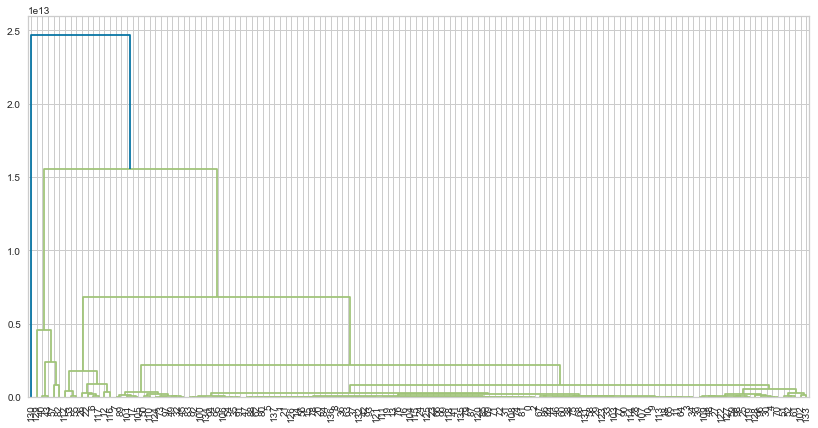

In [137]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

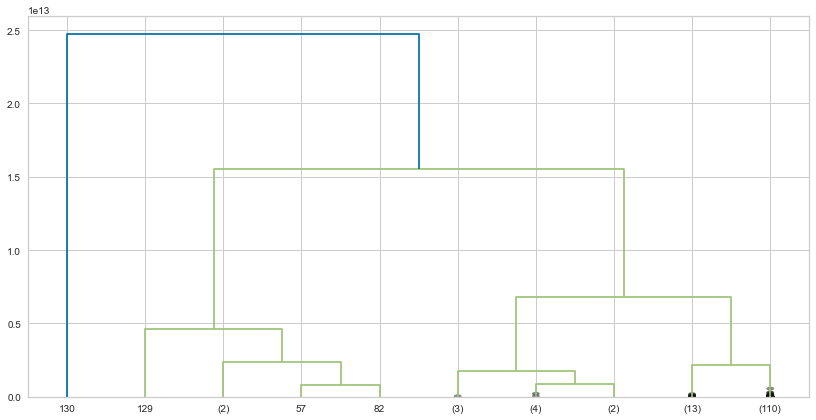

In [138]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

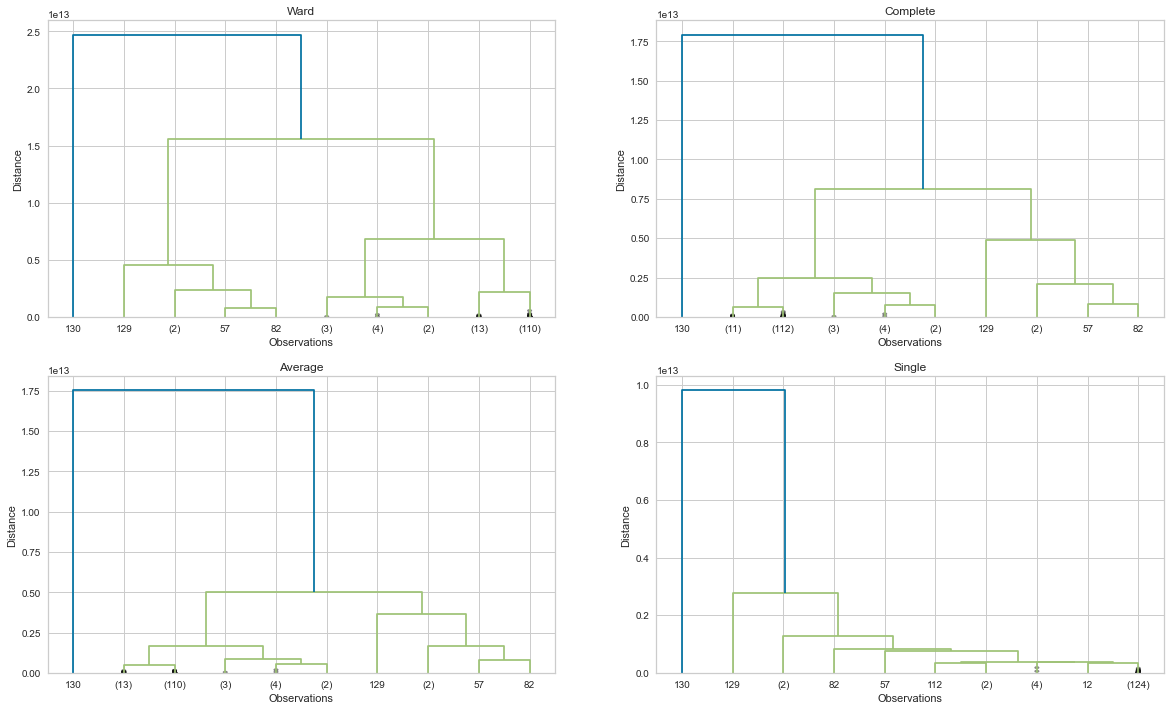

In [139]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

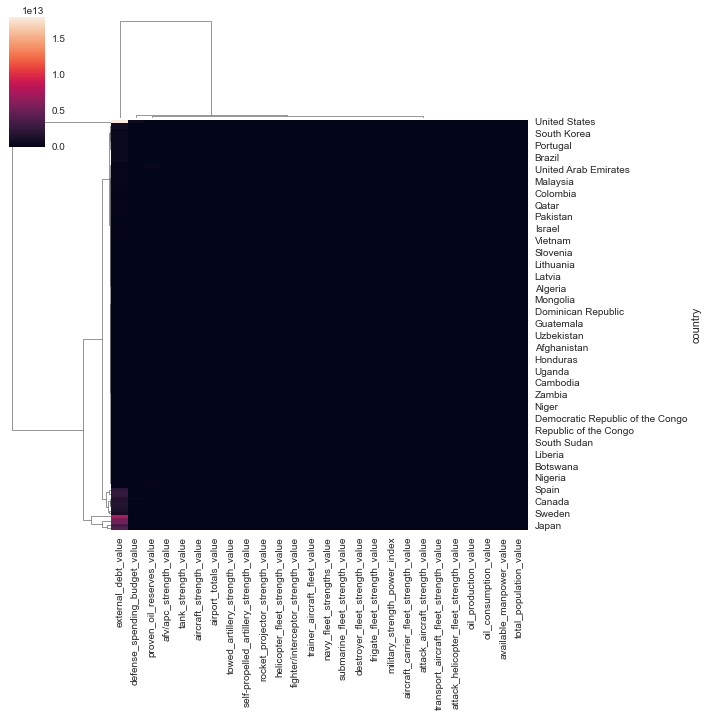

In [140]:
sns.clustermap(df2);

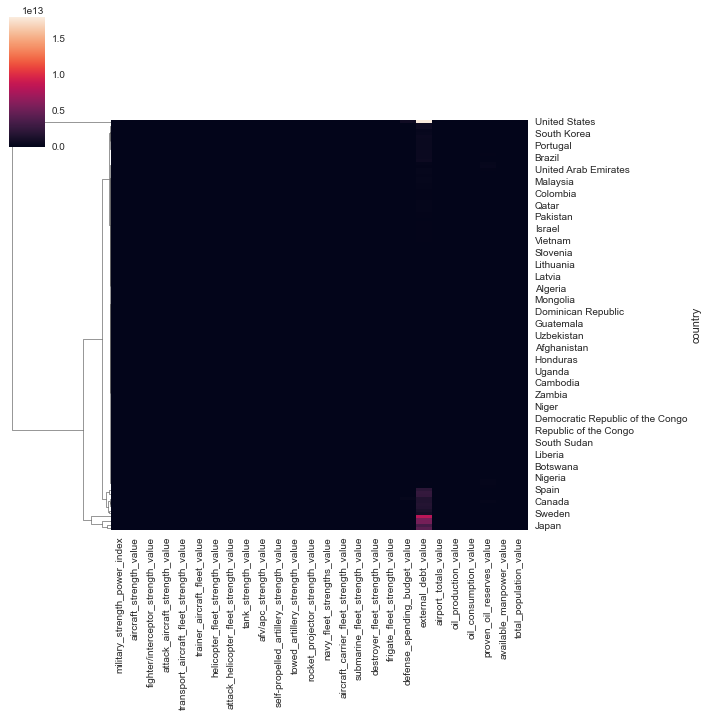

In [141]:
sns.clustermap(df2, col_cluster=False);

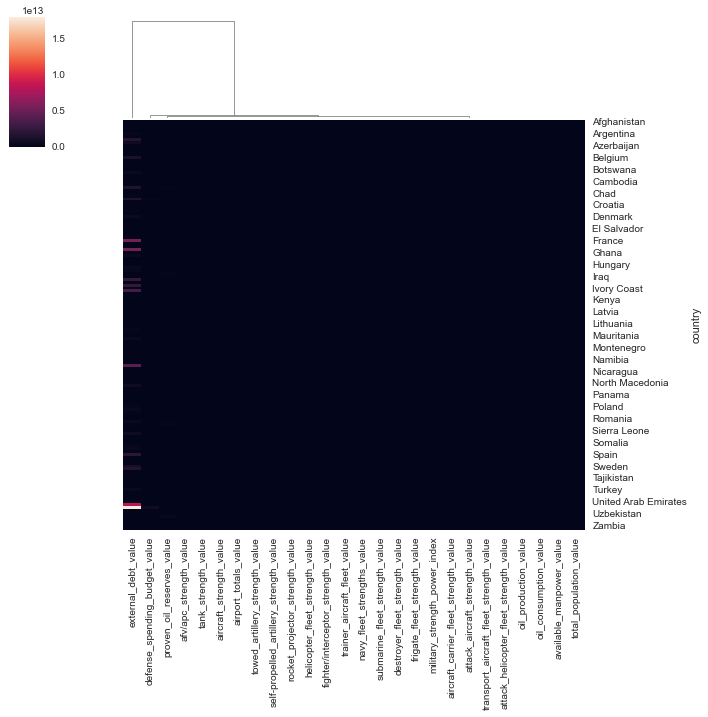

In [142]:
sns.clustermap(df2, row_cluster=False);

### Model Building and label visualisation

In [143]:
from sklearn.cluster import AgglomerativeClustering

### Evaluate 